In [1]:
import psycopg2
import pandas as pd
import matplotlib.lines as mlines
import re
import datetime
import random
import nltk
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopword = stopwords.words('english')

In [2]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
text = "This is a Demo Text for NLP using NLTK. Full form of NLTK is Natural Language Toolkit"
print(text.lower())
word_tokens = nltk.word_tokenize(text.lower())
print(word_tokens)
stopwords_removed = [word for word in word_tokens if word not in stopword]
print(stopwords_removed)

this is a demo text for nlp using nltk. full form of nltk is natural language toolkit
['this', 'is', 'a', 'demo', 'text', 'for', 'nlp', 'using', 'nltk', '.', 'full', 'form', 'of', 'nltk', 'is', 'natural', 'language', 'toolkit']
['demo', 'text', 'nlp', 'using', 'nltk', '.', 'full', 'form', 'nltk', 'natural', 'language', 'toolkit']


### Connect to PostgreSQL database

In [3]:
try:
    conn = psycopg2.connect(host="localhost",database="mimic",user="walter",password="walters",
                            options="-c search_path=mimiciii")
except:
    print("I am unable to connect to the database")


In [4]:
cur = conn.cursor()

In [5]:
cur.execute("SELECT * FROM NOTEEVENTS LIMIT 6;")

In [6]:
data_array = cur.fetchall()

In [7]:
NOTEEVENTS_df = pd.DataFrame(data_array,columns=["ROW_ID","SUBJECT_ID","HADM_ID","CHARTDATE","CHARTIME","STORETIME","CATEGORY","DESCRIPTION","CGID","ISERROR","TEXT"])

In [8]:
NOTEEVENTS_df["TEXT"][1].split('\n')

['Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]',
 '',
 'Date of Birth:                    Sex:  F',
 '',
 'Service:  MICU and then to [**Doctor Last Name **] Medicine',
 '',
 'HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female',
 'with a history of emphysema (not on home O2), who presents',
 'with three days of shortness of breath thought by her primary',
 'care doctor to be a COPD flare.  Two days prior to admission,',
 'she was started on a prednisone taper and one day prior to',
 'admission she required oxygen at home in order to maintain',
 'oxygen saturation greater than 90%.  She has also been on',
 'levofloxacin and nebulizers, and was not getting better, and',
 'presented to the [**Hospital1 18**] Emergency Room.',
 '',
 'In the [**Hospital3 **] Emergency Room, her oxygen saturation was',
 '100% on CPAP.  She was not able to be weaned off of this',
 'despite nebulizer treatment and Solu-Medrol 125 mg IV x2.',
 '',
 'Review of systems is negativ

In [9]:
NOTEEVENTS_df["TEXT"][2].split('\n')

['Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]',
 '',
 '',
 'Service: CARDIOTHORACIC',
 '',
 'Allergies:',
 'Amlodipine',
 '',
 'Attending:[**Last Name (NamePattern1) 1561**]',
 'Chief Complaint:',
 '81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]',
 's/p perc trach [**5-13**]',
 '',
 'Major Surgical or Invasive Procedure:',
 'bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]',
 's/p trachealplasty [**5-5**]',
 'percutaneous tracheostomy [**5-13**] after failed extubation',
 'down size trach on [**5-25**] to size 6 cuffless',
 '',
 '',
 'History of Present Illness:',
 'This 81 year old woman has a history of COPD. Over the past five',
 '',
 'years she has had progressive difficulties with her breathing.',
 'In',
 '[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure',
 'due',
 'to a COPD exacerbation. Due to persistent hypoxemia, she',
 'required',
 'intubation and a eventual bronchoscopy on [**2

In [10]:
NOTEEVENTS_df["TEXT"][3].split('\n')

['Admission Date:  [**2124-7-21**]              Discharge Date:   [**2124-8-18**]',
 '',
 '',
 'Service: MEDICINE',
 '',
 'Allergies:',
 'Amlodipine',
 '',
 'Attending:[**First Name3 (LF) 898**]',
 'Chief Complaint:',
 'COPD exacerbation/Shortness of Breath',
 '',
 'Major Surgical or Invasive Procedure:',
 'Intubation',
 'arterial line placement',
 'PICC line placement',
 'Esophagogastroduodenoscopy',
 '',
 '',
 'History of Present Illness:',
 '87 yo F with h/o CHF, COPD on 5 L oxygen at baseline,',
 'tracheobronchomalacia s/p stent, presents with acute dyspnea',
 'over several days, and lethargy. This morning patient developed',
 'an acute worsening in dyspnea, and called EMS. EMS found patient',
 'tachypnic at saturating 90% on 5L. Patient was noted to be',
 'tripoding. She was given a nebulizer and brought to the ER.',
 '.',
 "According the patient's husband, she was experiencing symptoms",
 'consistent with prior COPD flares. Apparently patient was',
 'without cough, chest pain, fe

### Let's just focus on the discharge medications for now

In [11]:
patient_1_text = NOTEEVENTS_df["TEXT"][1].lower()
patient_1_text = patient_1_text.split('\n')
start_idx = [i for i,s in enumerate(patient_1_text) if 'discharge medications' in s]
stop_idx = patient_1_text[start_idx[0]:].index('')

In [12]:
patient_1_text[start_idx[0]:stop_idx+start_idx[0]]

['discharge medications:',
 '1. levothyroxine 75 mcg p.o. q.d.',
 '2. citalopram 10 mg p.o. q.d.',
 '3. aspirin 81 mg p.o. q.d.',
 '4. fluticasone 110 mcg two puffs inhaled b.i.d.',
 '5. salmeterol diskus one inhalation b.i.d.',
 '6. acetaminophen 325-650 mg p.o. q.4-6h. prn.',
 '7. ipratropium bromide mdi two puffs inhaled q.2h. prn.',
 '8. albuterol 1-2 puffs inhaled q.2h. prn.',
 '9. zolpidem tartrate 5 mg p.o. q.h.s. prn.',
 '10. isosorbide dinitrate 10 mg p.o. t.i.d.',
 '11. diltiazem 60 mg p.o. q.i.d.',
 '12. pantoprazole 40 mg p.o. q.24h.',
 '13. trazodone 25 mg p.o. q.h.s. prn.',
 '14. subq heparin 5000 units subcutaneous b.i.d. until such',
 'time that the patient is able to get out of bed twice a day.',
 '15. cepacol lozenges q.2h. prn.',
 '16. levofloxacin 500 mg p.o. q.d. for a seven day course to',
 'be completed on [**2118-6-21**].',
 '17. kaopectate/benadryl/lidocaine 5 ml p.o. b.i.d. prn, not',
 'to be given around mealtimes for concern of dysphagia induced',
 'by lidoc

In [13]:
patient_1_dm = patient_1_text[start_idx[0]:stop_idx+start_idx[0]]

In [14]:
patient_1_dm_text = " ".join(patient_1_dm)

In [15]:
re.findall('\w+',patient_1_dm_text)

['discharge',
 'medications',
 '1',
 'levothyroxine',
 '75',
 'mcg',
 'p',
 'o',
 'q',
 'd',
 '2',
 'citalopram',
 '10',
 'mg',
 'p',
 'o',
 'q',
 'd',
 '3',
 'aspirin',
 '81',
 'mg',
 'p',
 'o',
 'q',
 'd',
 '4',
 'fluticasone',
 '110',
 'mcg',
 'two',
 'puffs',
 'inhaled',
 'b',
 'i',
 'd',
 '5',
 'salmeterol',
 'diskus',
 'one',
 'inhalation',
 'b',
 'i',
 'd',
 '6',
 'acetaminophen',
 '325',
 '650',
 'mg',
 'p',
 'o',
 'q',
 '4',
 '6h',
 'prn',
 '7',
 'ipratropium',
 'bromide',
 'mdi',
 'two',
 'puffs',
 'inhaled',
 'q',
 '2h',
 'prn',
 '8',
 'albuterol',
 '1',
 '2',
 'puffs',
 'inhaled',
 'q',
 '2h',
 'prn',
 '9',
 'zolpidem',
 'tartrate',
 '5',
 'mg',
 'p',
 'o',
 'q',
 'h',
 's',
 'prn',
 '10',
 'isosorbide',
 'dinitrate',
 '10',
 'mg',
 'p',
 'o',
 't',
 'i',
 'd',
 '11',
 'diltiazem',
 '60',
 'mg',
 'p',
 'o',
 'q',
 'i',
 'd',
 '12',
 'pantoprazole',
 '40',
 'mg',
 'p',
 'o',
 'q',
 '24h',
 '13',
 'trazodone',
 '25',
 'mg',
 'p',
 'o',
 'q',
 'h',
 's',
 'prn',
 '14',
 'subq'

In [16]:
patient_2_text = NOTEEVENTS_df["TEXT"][2].lower()
patient_2_text = patient_2_text.split('\n')
start_idx_2 = [i for i,s in enumerate(patient_2_text) if 'discharge medications' in s]
stop_idx_2 = patient_2_text[start_idx_2[0]:].index('')

In [17]:
patient_2_text[start_idx_2[0]:start_idx_2[0]+stop_idx_2]

['discharge medications:',
 '1. albuterol sulfate 0.083 % solution sig: one (1)  inhalation',
 'q6h (every 6 hours) as needed for wheezing.',
 '2. ipratropium bromide 0.02 % solution sig: one (1)  inhalation',
 'q6h (every 6 hours) as needed for wheezing.',
 '3. fluticasone-salmeterol 250-50 mcg/dose disk with device sig:',
 'one (1) disk with device inhalation [**hospital1 **] (2 times a day).',
 '4. albuterol 90 mcg/actuation aerosol sig: 1-2 puffs inhalation',
 'q6h (every 6 hours) as needed.',
 '5. ipratropium bromide 18 mcg/actuation aerosol sig: two (2)',
 'puff inhalation qid (4 times a day).',
 '6. acetaminophen 325 mg tablet sig: 1-2 tablets po q4-6h (every',
 '4 to 6 hours) as needed.',
 '7. sodium chloride 0.65 % aerosol, spray sig: [**2-5**] sprays nasal',
 'qid (4 times a day) as needed.',
 '8. camphor-menthol 0.5-0.5 % lotion sig: one (1) appl topical',
 'tid (3 times a day) as needed.',
 '9. enoxaparin sodium 60 mg/0.6ml syringe sig: one (1)',
 'subcutaneous q12h (every 

In [18]:
patient_2_dm = patient_2_text[start_idx_2[0]:start_idx_2[0]+stop_idx_2]

In [19]:
patient_2_dm_text = " ".join(patient_2_dm)

In [20]:
re.findall('\w+',patient_2_dm_text)

['discharge',
 'medications',
 '1',
 'albuterol',
 'sulfate',
 '0',
 '083',
 'solution',
 'sig',
 'one',
 '1',
 'inhalation',
 'q6h',
 'every',
 '6',
 'hours',
 'as',
 'needed',
 'for',
 'wheezing',
 '2',
 'ipratropium',
 'bromide',
 '0',
 '02',
 'solution',
 'sig',
 'one',
 '1',
 'inhalation',
 'q6h',
 'every',
 '6',
 'hours',
 'as',
 'needed',
 'for',
 'wheezing',
 '3',
 'fluticasone',
 'salmeterol',
 '250',
 '50',
 'mcg',
 'dose',
 'disk',
 'with',
 'device',
 'sig',
 'one',
 '1',
 'disk',
 'with',
 'device',
 'inhalation',
 'hospital1',
 '2',
 'times',
 'a',
 'day',
 '4',
 'albuterol',
 '90',
 'mcg',
 'actuation',
 'aerosol',
 'sig',
 '1',
 '2',
 'puffs',
 'inhalation',
 'q6h',
 'every',
 '6',
 'hours',
 'as',
 'needed',
 '5',
 'ipratropium',
 'bromide',
 '18',
 'mcg',
 'actuation',
 'aerosol',
 'sig',
 'two',
 '2',
 'puff',
 'inhalation',
 'qid',
 '4',
 'times',
 'a',
 'day',
 '6',
 'acetaminophen',
 '325',
 'mg',
 'tablet',
 'sig',
 '1',
 '2',
 'tablets',
 'po',
 'q4',
 '6h',
 'e

In [21]:
patient_3_text = NOTEEVENTS_df["TEXT"][3].lower()
patient_3_text = patient_3_text.split('\n')
start_idx_3 = [i for i,s in enumerate(patient_3_text) if 'discharge medications' in s]
stop_idx_3 = patient_3_text[start_idx_3[0]:].index('')

In [22]:
patient_3_text[start_idx_3[0]:start_idx_3[0]+stop_idx_3]

['discharge medications:',
 '1. metoprolol succinate 50 mg tablet sustained release 24 hr',
 'sig: one (1) tablet sustained release 24 hr po once a day.',
 '2. atorvastatin 20 mg tablet sig: one (1) tablet po daily',
 '(daily).',
 '3. folic acid 1 mg tablet sig: one (1) tablet po daily (daily).']

### From this list of discharge medications, let's write a simple program, using machine learning techniques, to see if the patient has to take aspirin. OR LET'S SEE IF WE CAN PREDICT HOW THE PATIENT WILL NEED FOLLOW UP (YES/NO) BASED ON THEIR MEDICATIONS!! 

output for a patient is 1 or 0: 1 means patient will take aspirin; 0 means patient will not take aspirin 

### Let's get the follow-up conditition

In [23]:
start_fu_idx = [i for i,s in enumerate(patient_1_text[start_idx[0]+stop_idx:]) if re.search("follow.?up",s)]
print(start_fu_idx)

[1, 3, 4, 5]


In [24]:
patient_1_text[start_idx[0]+stop_idx+1]

'follow-up plans:  the patient is recommended to followup with'

Patient 1 needs a follow-up!

In [25]:
start_fu_idx_2 = [i for i,s in enumerate(patient_2_text[start_idx_2[0]+stop_idx_2:]) if re.search("follow.?up",s)]
print(start_fu_idx_2)

[]


Patient 2 does not need a follow-up!

In [26]:
start_fu_idx_3 = [i for i,s in enumerate(patient_3_text[start_idx_3[0]+stop_idx_3:]) if re.search("follow.?up",s)]
print(start_fu_idx_3)

[103, 105, 106, 110]


In [27]:
patient_3_text[start_idx_3[0]+stop_idx_3+103]

'follow up as indicated below.'

Patient 3 has a follow up!

### Make "vocabulary" list for medications

In [28]:
test_tokens = nltk.word_tokenize(NOTEEVENTS_df["TEXT"][1].lower())

In [29]:
if any(word in test_tokens for word in ['discharge']):
    print 'found one of em'

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('found one of em')? (<ipython-input-29-8cb3824fdf7c>, line 2)

In [ ]:
test_tokens.index('medications')

In [ ]:
test_tokens[600]

In [ ]:
test_sent_tokens= nltk.sent_tokenize(NOTEEVENTS_df["TEXT"][1].lower())

In [ ]:
[i for i,s in enumerate(test_sent_tokens) if 'discharge medications' in s]

In [ ]:
test_sent_tokens[102:]

In [ ]:
test_sent_tokens

In [ ]:
test_sent_tokens2= nltk.sent_tokenize(NOTEEVENTS_df["TEXT"][2].lower())

In [ ]:
test_sent_tokens2

In [ ]:
[i for i,s in enumerate(test_sent_tokens2) if 'discharge medications' in s]

In [ ]:
test_sent_tokens2[78]

In [ ]:
NOTEEVENTS_df["TEXT"][2].split('\n')

In [ ]:
NOTEEVENTS_df["TEXT"][1].split('\n')

## START HERE

In [2]:
DIAGNOSES_ICD_df = pd.read_csv("DIAGNOSES_ICD.csv")

In [3]:
DIAGNOSES_ICD_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [32]:
icd9_code_counts = DIAGNOSES_ICD_df["ICD9_CODE"]

In [ ]:
icd9_code_counts.value_counts();

In [30]:
icd9_code_counts[0]

NameError: name 'icd9_code_counts' is not defined

In [4]:
ADMISSIONS_df = pd.read_csv("ADMISSIONS.csv")

In [48]:
ADMISSIONS_df.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1
6,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
7,28,28,162569,2177-09-01 07:15:00,2177-09-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
8,29,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,NaN,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,NaN,NaN,UNSTABLE ANGINA\CATH,0,1
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1


In [5]:
ethnicity_df = ADMISSIONS_df["ETHNICITY"].copy()

In [6]:
ethnicity_df.replace(to_replace=' - [A-Z]*',value='',regex=True, inplace=True)

In [7]:
ethnicity_df.replace(to_replace='/[A-Z]*',value='',regex=True, inplace=True)

In [8]:
ethnicity_df.replace(to_replace=' [A-Z]*',value='',regex=True,inplace=True)

In [9]:
ethnicity_df.replace(to_replace=['UNKNOWN','UNABLE','PATIENT','MULTI','AMERICAN','PORTUGUESE','MIDDLE','NATIVE','HISPANIC(OTHER)','CARIBBEAN','SOUTH'],value='OTHER',inplace=True)

In [10]:
ethnicity_df.value_counts()

WHITE       41325
OTHER        7744
BLACK        5785
HISPANIC     2115
ASIAN        2007
Name: ETHNICITY, dtype: int64

### ETHINICITY HAS BEEN REDUCED

In [11]:
diagnosis_df = ADMISSIONS_df["DIAGNOSIS"].copy()

In [ ]:
diagnosis_df.fillna()

In [88]:
l = []
for idx,row in enumerate(diagnosis_df,1):
    #system 1 separates with semi-colons
    if type(row) == str:
        diag_list_semi = row.split(';')
        #print(diag_list_semi)
        #system 2 separates with double backslashes
        diag_list_back_slash = row.split('\\')
        #print(diag_back_slash)
        #print(diag_list.split('\\'))
        if len(diag_list_back_slash) >= len(diag_list_semi):
            l.append(len(diag_list_back_slash))
        else:
            l.append(len(diag_list_semi))
    else:
        diagnosis_df.iat[idx] = 'NONE'
        l.append(1)

In [89]:
max(l)

6

In [12]:
diagnosis_df = diagnosis_df.to_frame()

In [13]:
diagnosis_df["D1"]='k'
diagnosis_df["D2"]='k'
diagnosis_df["D3"]='k'
diagnosis_df["D4"]='k'
diagnosis_df["D5"]='k'
diagnosis_df["D6"]='k'

In [15]:
diagnosis_df.head(100)

,DIAGNOSIS,D1,D2,D3,D4,D5,D6
0,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE
1,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,CORONARY ARTERY DISEASE,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY DISEASE,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY DISEASE
2,BRAIN MASS,BRAIN MASS,BRAIN MASS,BRAIN MASS,BRAIN MASS,BRAIN MASS,BRAIN MASS
3,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION
4,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME
5,V-TACH,V-TACH,V-TACH,V-TACH,V-TACH,V-TACH,V-TACH
6,NEWBORN,NEWBORN,NEWBORN,NEWBORN,NEWBORN,NEWBORN,NEWBORN
7,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,CORONARY ARTERY DISEASE,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY BYPASS GRAFT/SDA
8,UNSTABLE ANGINA\CATH,UNSTABLE ANGINA,CATH,UNSTABLE ANGINA,UNSTABLE ANGINA,CATH,CATH
9,STATUS EPILEPTICUS,STATUS EPILEPTICUS,STATUS EPILEPTICUS,STATUS EPILEPTICUS,STATUS EPILEPTICUS,STATUS EPILEPTICUS,STATUS EPILEPTICUS


In [14]:
for idx,row in enumerate(diagnosis_df.itertuples(),1):
    if type(row.DIAGNOSIS) == str:
        diag_list_semi = row.DIAGNOSIS.split(';')
        diag_list_back_slash = row.DIAGNOSIS.split('\\')
        if len(diag_list_back_slash) >= len(diag_list_semi):
                if len(diag_list_back_slash) == 1:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D5"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D6"]=diag_list_back_slash[0]                   
                elif len(diag_list_back_slash) == 2:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_back_slash[1]
                    diagnosis_df.at[row.Index,"D3"]=random.choice(diag_list_back_slash)
                    diagnosis_df.at[row.Index,"D4"]=random.choice(diag_list_back_slash)
                    diagnosis_df.at[row.Index,"D5"]=random.choice(diag_list_back_slash)
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_back_slash)
                elif len(diag_list_back_slash) == 3:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_back_slash[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_back_slash[2]
                    diagnosis_df.at[row.Index,"D4"]=random.choice(diag_list_back_slash)
                    diagnosis_df.at[row.Index,"D5"]=random.choice(diag_list_back_slash)
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_back_slash)
                elif len(diag_list_back_slash) == 4:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_back_slash[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_back_slash[2]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_back_slash[3]
                    diagnosis_df.at[row.Index,"D5"]=random.choice(diag_list_back_slash)
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_back_slash)                   
                elif len(diag_list_back_slash) == 5:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_back_slash[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_back_slash[2]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_back_slash[3]
                    diagnosis_df.at[row.Index,"D5"]=diag_list_back_slash[4]
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_back_slash)
                elif len(diag_list_back_slash) == 6:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_back_slash[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_back_slash[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_back_slash[2]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_back_slash[3]
                    diagnosis_df.at[row.Index,"D5"]=diag_list_back_slash[4]
                    diagnosis_df.at[row.Index,"D6"]=diag_list_back_slash[5]           
        else:
                if len(diag_list_semi) == 1:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D5"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D6"]=diag_list_semi[0]                   
                elif len(diag_list_semi) == 2:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_semi[1]
                    diagnosis_df.at[row.Index,"D3"]=random.choice(diag_list_semi)
                    diagnosis_df.at[row.Index,"D4"]=random.choice(diag_list_semi)
                    diagnosis_df.at[row.Index,"D5"]=random.choice(diag_list_semi)
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_semi)
                elif len(diag_list_semi) == 3:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_semi[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_semi[2]
                    diagnosis_df.at[row.Index,"D4"]=random.choice(diag_list_semi)
                    diagnosis_df.at[row.Index,"D5"]=random.choice(diag_list_semi)
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_semi)
                elif len(diag_list_semi) == 4:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_semi[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_semi[2]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_semi[3]
                    diagnosis_df.at[row.Index,"D5"]=random.choice(diag_list_semi)
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_semi)
                elif len(diag_list_semi) == 5:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_semi[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_semi[2]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_semi[3]
                    diagnosis_df.at[row.Index,"D5"]=diag_list_semi[4]
                    diagnosis_df.at[row.Index,"D6"]=random.choice(diag_list_semi)
                elif len(diag_list_semi) == 6:
                    diagnosis_df.at[row.Index,"D1"]=diag_list_semi[0]
                    diagnosis_df.at[row.Index,"D2"]=diag_list_semi[1]
                    diagnosis_df.at[row.Index,"D3"]=diag_list_semi[2]
                    diagnosis_df.at[row.Index,"D4"]=diag_list_semi[3]
                    diagnosis_df.at[row.Index,"D5"]=diag_list_semi[4]
                    diagnosis_df.at[row.Index,"D6"]=diag_list_semi[5]
    else:
        diagnosis_df.at[row.Index,"DIAGNOSIS"] = 'NONE'
        diagnosis_df.at[row.Index,"D1"]='NONE'
        diagnosis_df.at[row.Index,"D2"]='NONE'
        diagnosis_df.at[row.Index,"D3"]='NONE'
        diagnosis_df.at[row.Index,"D4"]='NONE'
        diagnosis_df.at[row.Index,"D5"]='NONE'
        diagnosis_df.at[row.Index,"D6"]='NONE'

In [ ]:
for row in diagnosis_df

In [34]:
ADMISSIONS_CDiff_pos_df = ADMISSIONS_df.head(1).copy()
ADMISSIONS_CDiff_pos_df.drop([0],inplace=True)
ADMISSIONS_CDiff_neg_df = ADMISSIONS_CDiff_pos_df.copy()

for row in DIAGNOSES_ICD_df.itertuples():
    #C. Diff. has ICD9 Code 00845
    if row.ICD9_CODE == '00845':
        #print(row.SUBJECT_ID,row.HADM_ID,row.ICD9_CODE)
        subject_id = row.SUBJECT_ID
        hadm_id = row.HADM_ID
        ADMISSIONS_CDiff_pos_df = ADMISSIONS_CDiff_pos_df.append(ADMISSIONS_df.loc[(ADMISSIONS_df['SUBJECT_ID'] == subject_id) & (ADMISSIONS_df['HADM_ID'] == hadm_id)])
        

In [ ]:
ADMISSIONS_CDiff_pos_df.head()

In [35]:
ADMISSIONS_CDiff_pos_df["target"]=1

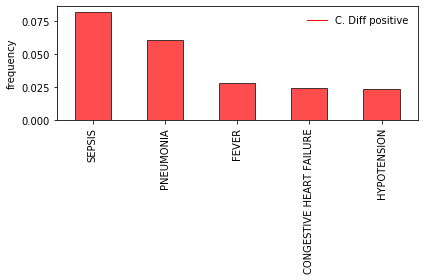

In [36]:
ADMISSIONS_CDiff_pos_df['DIAGNOSIS'].value_counts(normalize=True).head().plot(kind='bar',edgecolor='k',facecolor='r',alpha=0.7)
plt.xticks();
plt.yticks([0.0,0.025,0.05,0.075]);
plt.ylabel('frequency');
#create symbols for legend
cdiff_pos_line = mlines.Line2D([], [], c='r', lw=1.0, label='C. Diff positive');
plt.legend(handles=[cdiff_pos_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('week1_demo_Cdiff_pos.jpg')

In [ ]:
ADMISSIONS_CDiff_pos_df['DIAGNOSIS'].value_counts(normalize=True).to_csv("~/cdiff_pos.csv")

In [37]:
#try to get ADMISSIONS_CDiff_neg; it works!
ADMISSIONS_CDiff_neg_df = pd.concat([ADMISSIONS_df,ADMISSIONS_CDiff_pos_df]).drop_duplicates(keep=False)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


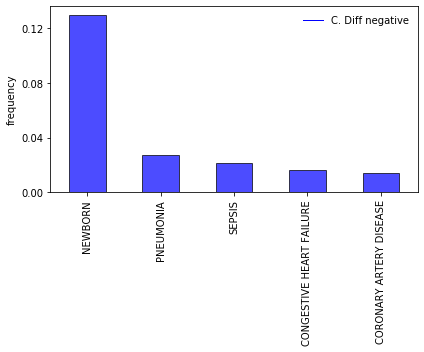

In [38]:
ADMISSIONS_CDiff_neg_df['DIAGNOSIS'].value_counts(normalize=True).head().plot(kind='bar',edgecolor='k',facecolor='b',alpha=0.7)
plt.xticks();
plt.yticks([0.0,0.04,0.08,0.12]);
plt.ylabel('frequency');
#create legend
cdiff_neg_line = mlines.Line2D([], [], c='b', lw=1.0, label='C. Diff negative');
plt.legend(handles=[cdiff_neg_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('week1_demo_Cdiff_neg.jpg')

In [39]:
ADMISSIONS_CDiff_neg_df["target"]=0

In [40]:
ADMISSIONS_CDiff_neg_df.head()

,ADMISSION_LOCATION,ADMISSION_TYPE,ADMITTIME,DEATHTIME,DIAGNOSIS,DISCHARGE_LOCATION,DISCHTIME,EDOUTTIME,EDREGTIME,ETHNICITY,HADM_ID,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,LANGUAGE,MARITAL_STATUS,RELIGION,ROW_ID,SUBJECT_ID,target
0,EMERGENCY ROOM ADMIT,EMERGENCY,2196-04-09 12:26:00,NaN,BENZODIAZEPINE OVERDOSE,DISC-TRAN CANCER/CHLDRN H,2196-04-10 15:54:00,2196-04-09 13:24:00,2196-04-09 10:06:00,WHITE,165315,1,0,Private,NaN,MARRIED,UNOBTAINABLE,21,22,0
1,PHYS REFERRAL/NORMAL DELI,ELECTIVE,2153-09-03 07:15:00,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,HOME HEALTH CARE,2153-09-08 19:10:00,NaN,NaN,WHITE,152223,1,0,Medicare,NaN,MARRIED,CATHOLIC,22,23,0
2,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,2157-10-18 19:34:00,NaN,BRAIN MASS,HOME HEALTH CARE,2157-10-25 14:00:00,NaN,NaN,WHITE,124321,1,0,Medicare,ENGL,MARRIED,CATHOLIC,23,23,0
3,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,2139-06-06 16:14:00,NaN,INTERIOR MYOCARDIAL INFARCTION,HOME,2139-06-09 12:48:00,NaN,NaN,WHITE,161859,1,0,Private,NaN,SINGLE,PROTESTANT QUAKER,24,24,0
4,EMERGENCY ROOM ADMIT,EMERGENCY,2160-11-02 02:06:00,NaN,ACUTE CORONARY SYNDROME,HOME,2160-11-05 14:55:00,2160-11-02 04:27:00,2160-11-02 01:01:00,WHITE,129635,1,0,Private,NaN,MARRIED,UNOBTAINABLE,25,25,0


In [41]:
ADMISSIONS_CDiff_pos_trunc_df = ADMISSIONS_CDiff_pos_df[["ADMISSION_TYPE","ADMISSION_LOCATION","ADMITTIME","DISCHTIME",
                                                         "ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                         "HAS_CHARTEVENTS_DATA","target"]]
ADMISSIONS_CDiff_neg_trunc_df = ADMISSIONS_CDiff_neg_df[["ADMISSION_TYPE","ADMISSION_LOCATION","ADMITTIME","DISCHTIME",
                                                         "ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                         "HAS_CHARTEVENTS_DATA","target"]]



In [42]:
ADMISSIONS_CDiff_pos_trunc_df.reset_index(drop=True,inplace=True)
ADMISSIONS_CDiff_pos_trunc_df.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,ADMITTIME,DISCHTIME,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,2135-01-30 20:50:00,2135-02-08 02:08:00,WHITE,1,1,1
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,2167-11-29 16:25:00,2167-12-23 12:20:00,WHITE,0,1,1
2,EMERGENCY,PHYS REFERRAL/NORMAL DELI,2140-02-16 14:40:00,2140-02-25 19:30:00,BLACK/AFRICAN AMERICAN,0,1,1
3,EMERGENCY,EMERGENCY ROOM ADMIT,2166-07-21 23:38:00,2166-07-28 12:45:00,WHITE,0,1,1
4,EMERGENCY,EMERGENCY ROOM ADMIT,2127-06-16 01:33:00,2127-06-28 20:25:00,WHITE,0,1,1


In [43]:
ADMISSIONS_CDiff_neg_trunc_df.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,ADMITTIME,DISCHTIME,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,2196-04-09 12:26:00,2196-04-10 15:54:00,WHITE,0,1,0
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,2153-09-03 07:15:00,2153-09-08 19:10:00,WHITE,0,1,0
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2157-10-18 19:34:00,2157-10-25 14:00:00,WHITE,0,1,0
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2139-06-06 16:14:00,2139-06-09 12:48:00,WHITE,0,1,0
4,EMERGENCY,EMERGENCY ROOM ADMIT,2160-11-02 02:06:00,2160-11-05 14:55:00,WHITE,0,1,0


In [44]:
ADMISSIONS_CDiff_pos_trunc_df.insert(4,"LOS",0)
ADMISSIONS_CDiff_neg_trunc_df.insert(4,"LOS",0)

In [45]:
ADMISSIONS_CDiff_pos_trunc_df["ADMITTIME"] = pd.to_datetime(ADMISSIONS_CDiff_pos_trunc_df["ADMITTIME"])
ADMISSIONS_CDiff_pos_trunc_df["DISCHTIME"] = pd.to_datetime(ADMISSIONS_CDiff_pos_trunc_df["DISCHTIME"])
ADMISSIONS_CDiff_neg_trunc_df["ADMITTIME"] = pd.to_datetime(ADMISSIONS_CDiff_neg_trunc_df["ADMITTIME"])
ADMISSIONS_CDiff_neg_trunc_df["DISCHTIME"] = pd.to_datetime(ADMISSIONS_CDiff_neg_trunc_df["DISCHTIME"])

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [46]:
ADMISSIONS_CDiff_pos_trunc_df["LOS"] = ADMISSIONS_CDiff_pos_trunc_df["DISCHTIME"] - ADMISSIONS_CDiff_pos_trunc_df["ADMITTIME"]

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
ADMISSIONS_CDiff_pos_trunc_df["LOS"]=ADMISSIONS_CDiff_pos_trunc_df["LOS"].dt.total_seconds()/datetime.timedelta(days=1).total_seconds()

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
ADMISSIONS_CDiff_neg_trunc_df["LOS"] = ADMISSIONS_CDiff_neg_trunc_df["DISCHTIME"] - ADMISSIONS_CDiff_neg_trunc_df["ADMITTIME"]

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
ADMISSIONS_CDiff_neg_trunc_df["LOS"]=ADMISSIONS_CDiff_neg_trunc_df["LOS"].dt.total_seconds()/datetime.timedelta(days=1).total_seconds()

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
ADMISSIONS_CDiff_pos_trunc_df["LOS"]= ADMISSIONS_CDiff_pos_trunc_df["LOS"].round(2)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
ADMISSIONS_CDiff_neg_trunc_df["LOS"]= ADMISSIONS_CDiff_neg_trunc_df["LOS"].round(2)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


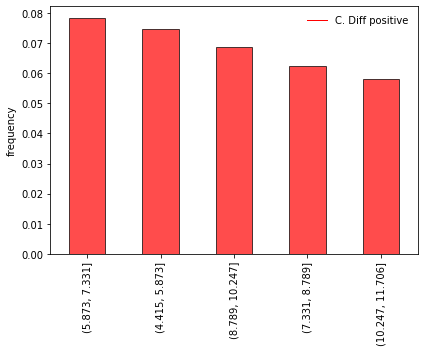

In [52]:
ADMISSIONS_CDiff_pos_trunc_df['LOS'].value_counts(normalize=True,bins=100).head().plot(kind='bar',edgecolor='k',facecolor='r',alpha=0.7)
plt.xticks();
#plt.yticks([0.0,0.025,0.05,0.075]);
plt.ylabel('frequency');
#create symbols for legend
cdiff_pos_line = mlines.Line2D([], [], c='r', lw=1.0, label='C. Diff positive');
plt.legend(handles=[cdiff_pos_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
#plt.savefig('week1_demo_Cdiff_pos.jpg')

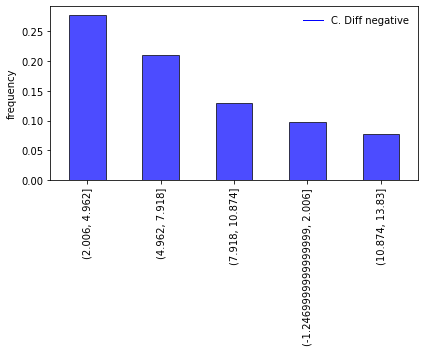

In [53]:
ADMISSIONS_CDiff_neg_trunc_df['LOS'].value_counts(normalize=True,bins=100).head().plot(kind='bar',edgecolor='k',facecolor='b',alpha=0.7)
plt.xticks();
#plt.yticks([0.0,0.04,0.08,0.12]);
plt.ylabel('frequency');
#create legend
cdiff_neg_line = mlines.Line2D([], [], c='b', lw=1.0, label='C. Diff negative');
plt.legend(handles=[cdiff_neg_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
#plt.savefig('week1_demo_Cdiff_neg.jpg')

In [ ]:
ADMISSIONS_CDiff_neg_trunc_df.loc[ADMISSIONS_CDiff_neg_trunc_df["LOS"] < 0.0]

In [54]:
ADMISSIONS_CDiff_pos_diag_df = ADMISSIONS_CDiff_pos_df[["DIAGNOSIS","target"]]
ADMISSIONS_CDiff_neg_diag_df = ADMISSIONS_CDiff_neg_df[["DIAGNOSIS","target"]]

In [55]:
ADMISSIONS_CDiff_pos_diag_df.insert(1,"D2",'k')

In [56]:
ADMISSIONS_CDiff_pos_diag_df.insert(2,"D3",'l')

In [57]:
ADMISSIONS_CDiff_pos_diag_df.insert(1,"D1",'j')

In [58]:
ADMISSIONS_CDiff_pos_diag_df.reset_index(drop=True,inplace=True)


In [59]:
ADMISSIONS_CDiff_pos_diag_df.head()

,DIAGNOSIS,D1,D2,D3,target
0,SEPSIS,j,k,l,1
1,AORTIC STENOSIS;ATRIAL FIBRILLATION\ATRIOVENTR...,j,k,l,1
2,STATUS POST KIDNEY TRANSPLANT;ELEVATED CREATININE,j,k,l,1
3,WEAKNESS;ANEMIA;TELEMETRY,j,k,l,1
4,ALTERED MENTAL STATUS,j,k,l,1


In [ ]:
ADMISSIONS_CDiff_pos_diag_df["DIAGNOSIS"].iloc[15].split(';')

In [ ]:
ADMISSIONS_CDiff_pos_diag_df.shape

In [ ]:
diag_feature_length = []
for row in ADMISSIONS_CDiff_pos_diag_df.itertuples():
    diag_feature_length.append(len(row.DIAGNOSIS.split(';')))

In [60]:
for idx,row in enumerate(ADMISSIONS_CDiff_pos_diag_df.itertuples(),1):
    diag_list = row.DIAGNOSIS.split(';')
    #print(diag_list)
    #print(idx)
    if len(diag_list) == 1:
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D1"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D2"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D3"]=diag_list[0]
    elif len(diag_list) == 2:
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D1"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D2"]=diag_list[1]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D3"]=random.choice(diag_list)
    else:
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D1"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D2"]=diag_list[1]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D3"]=diag_list[2]

In [61]:
ADMISSIONS_CDiff_neg_diag_df.insert(1,"D2",'k')

In [62]:
ADMISSIONS_CDiff_neg_diag_df.insert(2,"D3",'l')

In [63]:
ADMISSIONS_CDiff_neg_diag_df.insert(1,"D1",'j')

In [64]:
ADMISSIONS_CDiff_neg_diag_df.head()

,DIAGNOSIS,D1,D2,D3,target
0,BENZODIAZEPINE OVERDOSE,j,k,l,0
1,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,j,k,l,0
2,BRAIN MASS,j,k,l,0
3,INTERIOR MYOCARDIAL INFARCTION,j,k,l,0
4,ACUTE CORONARY SYNDROME,j,k,l,0


In [65]:
for idx,row in enumerate(ADMISSIONS_CDiff_neg_diag_df.itertuples(),1):
    if type(row.DIAGNOSIS) == str:
        diag_list = row.DIAGNOSIS.split(';')
        #print(diag_list)
        #print(idx)
        if len(diag_list) == 1:
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D1"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D2"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D3"]=diag_list[0]
        elif len(diag_list) == 2:
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D1"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D2"]=diag_list[1]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D3"]=random.choice(diag_list)
        else:
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D1"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D2"]=diag_list[1]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D3"]=diag_list[2]

In [ ]:
max(diag_feature_length)

In [ ]:
diag_feature_length = []
for row in ADMISSIONS_df.itertuples():
    if type(row.DIAGNOSIS) != str:
        print(row.DIAGNOSIS)
        #print(len(row.DIAGNOSIS.split(';')))
        #diag_feature_length.append(len(row.DIAGNOSIS.split(';')))

In [66]:
ADMISSIONS_CDiff_pos_preprocess = pd.concat([ADMISSIONS_CDiff_pos_trunc_df[["ADMISSION_TYPE","ADMISSION_LOCATION",
                                                                           "LOS","ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                                           "HAS_CHARTEVENTS_DATA"]]
                                            ,ADMISSIONS_CDiff_pos_diag_df[["D1","D2","D3","target"]]],axis=1)

In [67]:
ADMISSIONS_CDiff_pos_preprocess.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,LOS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,D1,D2,D3,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,8.22,WHITE,1,1,SEPSIS,SEPSIS,SEPSIS,1
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,23.83,WHITE,0,1,AORTIC STENOSIS,ATRIAL FIBRILLATION\ATRIOVENTRICULAR RECIPROCA...,MITRAL VALVE REPLACEMENT,1
2,EMERGENCY,PHYS REFERRAL/NORMAL DELI,9.20,BLACK/AFRICAN AMERICAN,0,1,STATUS POST KIDNEY TRANSPLANT,ELEVATED CREATININE,STATUS POST KIDNEY TRANSPLANT,1
3,EMERGENCY,EMERGENCY ROOM ADMIT,6.55,WHITE,0,1,WEAKNESS,ANEMIA,TELEMETRY,1
4,EMERGENCY,EMERGENCY ROOM ADMIT,12.79,WHITE,0,1,ALTERED MENTAL STATUS,ALTERED MENTAL STATUS,ALTERED MENTAL STATUS,1


In [68]:
ADMISSIONS_CDiff_neg_preprocess = pd.concat([ADMISSIONS_CDiff_neg_trunc_df[["ADMISSION_TYPE","ADMISSION_LOCATION",
                                                                           "LOS","ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                                           "HAS_CHARTEVENTS_DATA"]]
                                            ,ADMISSIONS_CDiff_neg_diag_df[["D1","D2","D3","target"]]],axis=1)

In [69]:
ADMISSIONS_CDiff_neg_preprocess.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,LOS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,D1,D2,D3,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,1.14,WHITE,0,1,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,0
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,5.50,WHITE,0,1,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,6.77,WHITE,0,1,BRAIN MASS,BRAIN MASS,BRAIN MASS,0
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.86,WHITE,0,1,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,0
4,EMERGENCY,EMERGENCY ROOM ADMIT,3.53,WHITE,0,1,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,0


In [70]:
ADMISSIONS_CDiff_preprocess = pd.concat([ADMISSIONS_CDiff_pos_preprocess,ADMISSIONS_CDiff_neg_preprocess],ignore_index=True)

In [ ]:
ADMISSIONS_CDiff_preprocess.dtypes

In [71]:
from sklearn.preprocessing import LabelBinarizer

In [72]:
#admission type
lb_style = LabelBinarizer()
lb_adm_type = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["ADMISSION_TYPE"])
adm_type = pd.DataFrame(lb_adm_type, columns=lb_style.classes_)
#admission location
lb_style = LabelBinarizer()
lb_adm_loc = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["ADMISSION_LOCATION"])
adm_loc = pd.DataFrame(lb_adm_loc, columns=lb_style.classes_)
#ethnicity
lb_style = LabelBinarizer()
lb_race = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["ETHNICITY"])
race = pd.DataFrame(lb_race, columns=lb_style.classes_)
#diagnosis
lb_style = LabelBinarizer()
lb_d1 = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["D1"])
d1 =  pd.DataFrame(lb_d1, columns=lb_style.classes_)

In [73]:
d1["ABDOMINAL PAIN"].head()

0    0
1    0
2    0
3    0
4    0
Name: ABDOMINAL PAIN, dtype: int64

In [74]:
admissions_digitized_df = pd.concat([adm_type,adm_loc,race,ADMISSIONS_CDiff_preprocess[["LOS","HOSPITAL_EXPIRE_FLAG","HAS_CHARTEVENTS_DATA","target"]]],axis=1)
admissions_digitized_df.head()

,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,UNKNOWN/NOT SPECIFIED,WHITE,WHITE - BRAZILIAN,WHITE - EASTERN EUROPEAN,WHITE - OTHER EUROPEAN,WHITE - RUSSIAN,LOS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,8.22,1,1,1
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,23.83,0,1,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,9.20,0,1,1
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,6.55,0,1,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,12.79,0,1,1


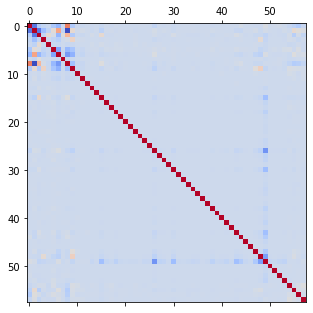

In [82]:
corr = admissions_digitized_df.corr()
#corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr,cmap=plt.cm.coolwarm)
#plt.show()
plt.savefig('./week_2/week2_admissions_features_corr_matrix_no_diagnosis.jpg')

In [ ]:
corr_html = corr.style.background_gradient(cmap='coolwarm').render()

In [ ]:
#import imgkit
#imgkit.from_string(corr_html, './week_2/admissions_features_corr_matrix_no_diagnosis.jpg')

In [ ]:
#admissions_digitized_d1_df = pd.concat([d1,ADMISSIONS_CDiff_preprocess["target"]],axis=1)

In [ ]:
#admissions_digitized_d1_df.to_csv("./data/admissions/admissions_digitized_d1.csv")

In [ ]:
#corr2 = admissions_digitized_d1_df.corr()
#corr2.style.background_gradient(cmap='coolwarm')

## OK THERE ARE WAAY TOO MANY FEATURES

### Let's make a simplified version of the dataset

In [ ]:
admissions_digitized_trunc_df = pd.concat([adm_type,adm_loc,race,d1[["SEPSIS","PNEUMONIA","FEVER","CONGESTIVE HEART FAILURE","HYPOTENSION","ABDOMINAL PAIN","ALTERED MENTAL STATUS","COLITIS","PANCREATITIS","UPPER GI BLEED","DIARRHEA"]],ADMISSIONS_CDiff_preprocess[["LOS","HOSPITAL_EXPIRE_FLAG","HAS_CHARTEVENTS_DATA","target"]]],axis=1)

In [ ]:
admissions_digitized_trunc_balanced_df = admissions_digitized_trunc_df.head(1444*2)

In [ ]:
admissions_digitized_trunc_balanced_df.tail()

In [ ]:
admissions_digitized_trunc_balanced_df.head()

In [ ]:
admissions_digitized_trunc_df.shape

In [ ]:
corr2 = admissions_digitized_trunc_df.corr()
corr2.style.background_gradient(cmap='coolwarm')

In [ ]:
admissions_digitized_trunc_df.head()

In [ ]:
admissions_digitized_trunc_shuffled_df = admissions_digitized_trunc_df.copy()

In [ ]:
admissions_digitized_trunc_shuffled_df = admissions_digitized_trunc_shuffled_df.sample(frac=1).reset_index(drop=True)

In [ ]:
admissions_digitized_trunc_shuffled_df.head()

In [ ]:
admissions_digitized_trunc_balanced_df = admissions_digitized_trunc_balanced_df.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = admissions_digitized_trunc_shuffled_df.loc[:, admissions_digitized_trunc_shuffled_df.columns != 'target']
y = admissions_digitized_trunc_shuffled_df.loc[:, admissions_digitized_trunc_shuffled_df.columns == 'target']

In [ ]:
X_train_balanced = admissions_digitized_trunc_balanced_df.loc[:, admissions_digitized_trunc_balanced_df.columns != 'target']
y_train_balanced = admissions_digitized_trunc_balanced_df.loc[:, admissions_digitized_trunc_balanced_df.columns == 'target']

In [ ]:
y.sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
y_train.sum()

In [ ]:
y_train.shape

In [ ]:
logisticRegr = LogisticRegression(C=0.5,penalty='l1')

In [ ]:
logisticRegr.fit(X_train_balanced, y_train_balanced)

In [ ]:
y_pred = logisticRegr.predict(X_test)
#from sklearn.metrics import f1_score
#f1_score(y_test,y_pred)
#print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr,tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
#fpr_0,tpr_0, thresholds = roc_curve(y_test, y_pred)
plt.figure()
#plt.plot(fpr_0, tpr_0, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_2/Log_ROC.jpg')
plt.show()

## Understand difference between y_pred and predict_proba

In [ ]:
y_pred.sum()

In [ ]:
logisticRegr.predict_proba(X_test)[:,1].sum()

In [ ]:
logisticRegr.predict_proba(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_estimators=100,max_depth=10,class_weight='balanced')

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
#admissions_digitized_trunc_take2_df = pd.concat([adm_type,adm_loc,race,d1[["SEPSIS","PNEUMONIA","FEVER","CONGESTIVE HEART FAILURE","HYPOTENSION","ABDOMINAL PAIN","ALTERED MENTAL STATUS","COLITIS","PANCREATITIS","UPPER GI BLEED","DIARRHEA"]],ADMISSIONS_CDiff_preprocess[["LOS","HOSPITAL_EXPIRE_FLAG","HAS_CHARTEVENTS_DATA","target"]]],axis=1)

In [ ]:
admissions_digitized_trunc_take2_df = pd.concat([adm_type[["EMERGENCY"]],race[["WHITE","ASIAN","HISPANIC OR LATINO","BLACK/AFRICAN AMERICAN"]],d1[["SEPSIS","PNEUMONIA","FEVER","CONGESTIVE HEART FAILURE","HYPOTENSION","ABDOMINAL PAIN","ALTERED MENTAL STATUS","COLITIS","PANCREATITIS","UPPER GI BLEED","DIARRHEA"]],ADMISSIONS_CDiff_preprocess[["LOS","target"]]],axis=1)

In [ ]:
admissions_digitized_trunc_take2_df = admissions_digitized_trunc_take2_df.sample(frac=1).reset_index(drop=True)

In [ ]:
admissions_digitized_trunc_take2_df.head()

In [ ]:
X = admissions_digitized_trunc_take2_df.loc[:, admissions_digitized_trunc_take2_df.columns != 'target']
y = admissions_digitized_trunc_take2_df.loc[:, admissions_digitized_trunc_take2_df.columns == 'target']

In [ ]:
y.sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
X_train.head()

In [ ]:
y_train.sum()

In [ ]:
logisticRegr = LogisticRegression(penalty='l2',max_iter=10000)

In [ ]:
logisticRegr.fit(X_train.to_numpy(), y_train["target"].tolist())

In [ ]:
X_train.to_numpy()

In [ ]:
y_pred = logisticRegr.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr_0,tpr_0, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
#fpr_1,tpr_1, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr_0, tpr_0, label='Random Forest (area = %0.2f)' % logit_roc_auc)
#plt.plot(fpr_1, tpr_1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_2/Random_Forest_ROC.jpg')
plt.show()

In [120]:
import joblib

In [ ]:
joblib.dump(logisticRegr,"./models/logistic_reg.mdl")

In [ ]:
joblib.dump(clf,"./models/random_forest.mdl")

In [ ]:
logisticRegr.predict(X_test.to_numpy()[0])

In [ ]:
X_test.to_numpy()[0].shape

In [ ]:
import numpy as np

In [ ]:
test_load_LogisticRegr = joblib.load("./models/logistic_reg.mdl")

In [ ]:
test_load_LogisticRegr.predict(X_test)

In [ ]:
X_test.to_numpy()[0].shape

In [ ]:
test_load_LogisticRegr.predict(X_test.iloc[0:1])

In [ ]:
X_test.iloc[0:1].to_csv("./data/df_for_app.csv",index=False)

In [ ]:
test_df = pd.read_csv("./data/df_for_app.csv")

In [ ]:
test_df = test_df.append({"ELECTIVE":1},ignore_index=True)

In [ ]:
test_df.iloc[0].to_csv("~/column_names.csv")

In [ ]:
test_df.iloc[:,:].fillna(0)

In [ ]:
test_df.iloc[-1:]

In [ ]:
dict(zip(["ELECTIVE","HYPOTENSION"],[1,0]))

In [ ]:
test_df.append(dict(zip(["ELECTIVE","HYPOTENSION"],[1,0])),ignore_index=True)

In [21]:
f_temperature = open("./temps/temperatures.csv","a")
with open("./CHARTEVENTS.csv") as fin:
    for line in fin:
        my_list = line.split(",")
        if my_list[4] == '678':
            #print(line)
            #break
            #f_carevue.write(line)
            f_temperature.write(line)
            #print(line)
            #break
        if my_list[4] == '223761':
            #print(line)
            #break
            #f_metavision.write(line)
            f_temperature.write(line)
            #print(line)
            #break
f_temperature.close()
fin.close()

In [16]:
df_temperatures = pd.read_csv("./temps/temperatures_trunc.csv",header=None)

In [32]:
df_temperatures.head()

,0,1,2
0,36,165660,97.3
1,34,144319,97.0
2,23,124321,98.4
3,23,124321,95.8
4,23,124321,97.2


In [17]:
df_temperatures.rename(columns={0:"SUBJECT_ID",1:"HADM_ID",2:"temperature_F"},inplace=True)

In [21]:
df_temperatures.shape

(48247, 3)

In [18]:
df_temperatures.drop_duplicates(subset=["SUBJECT_ID","HADM_ID"],inplace=True)

In [19]:
df_temperatures["temperature_F"] = df_temperatures["temperature_F"].round(2)

In [20]:
df_temperatures.head()

,SUBJECT_ID,HADM_ID,temperature_F
0,36,165660,97.3
1,34,144319,97.0
2,23,124321,98.4
31,85,112077,98.2
49,107,182383,97.6


In [24]:
f_heart_rate = open("./heart_rates/heart_rates.csv","a")
with open("./CHARTEVENTS.csv") as fin:
    for line in fin:
        my_list = line.split(",")
        if my_list[4] == '211':
            #print(line)
            #break
            #f_carevue.write(line)
            f_heart_rate.write(line)
            #print(line)
            #break
        if my_list[4] == '220045':
            #print(line)
            #break
            #f_metavision.write(line)
            f_heart_rate.write(line)
            #print(line)
            #break
f_heart_rate.close()
fin.close()

In [22]:
df_heart_rate = pd.read_csv("./heart_rates/heart_rates_trunc.csv",header=None)

In [23]:
df_heart_rate.rename(columns={0:"SUBJECT_ID",1:"HADM_ID",2:"heart_rate_bps"},inplace=True)

In [37]:
df_heart_rate.head()

,SUBJECT_ID,HADM_ID,heart_rate_bps
0,36,165660,86.0
1,36,165660,85.0
2,36,165660,87.0
3,36,165660,91.0
4,34,144319,44.0


In [24]:
df_heart_rate.drop_duplicates(subset=["SUBJECT_ID","HADM_ID"],inplace=True)

In [25]:
df_heart_rate.head()

,SUBJECT_ID,HADM_ID,heart_rate_bps
0,36,165660,86.0
4,34,144319,44.0
6,23,124321,85.0
141,85,112077,100.0
213,107,182383,73.0


In [23]:
fin.close()

In [13]:
f_carevue.close()

In [22]:
f_temperature.close()

In [26]:
# information used to create a database connection
sqluser = 'walter'
dbname = 'mimic'
schema_name = 'mimiciii'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(host="localhost",dbname=dbname, user=sqluser, password="walters")


# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

In [27]:
query = query_schema + """
WITH co AS
(
SELECT adm.subject_id, adm.hadm_id
, adm.admittime - pat.dob AS age
FROM admissions adm
INNER JOIN patients pat
  ON adm.subject_id = pat.subject_id
)
SELECT
  co.subject_id, co.hadm_id, co.age
  , EXTRACT('year' FROM co.age) as age_extract_year 
  , EXTRACT('year' FROM co.age) 
    + EXTRACT('months' FROM co.age) / 12.0
    + EXTRACT('days' FROM co.age) / 365.242
    + EXTRACT('hours' FROM co.age) / 24.0 / 364.242
    as age_extract_precise
  , EXTRACT('epoch' from co.age) / 60.0 / 60.0 / 24.0 / 365.242 as age_extract_epoch
FROM co
"""
df_ages = pd.read_sql_query(query, con)
df_ages.head()

,subject_id,hadm_id,age,age_extract_year,age_extract_precise,age_extract_epoch
0,22,165315,"23714 days, 12:26:00",0.0,64.928188,64.928234
1,23,152223,"25980 days, 7:15:00",0.0,71.131722,71.131748
2,23,124321,"27486 days, 19:34:00",0.0,75.256388,75.256447
3,24,161859,"14250 days, 16:14:00",0.0,39.017059,39.017080
4,25,129635,"21531 days, 2:06:00",0.0,58.950185,58.950196


In [28]:
df_ages.drop(columns=["age","age_extract_year","age_extract_epoch"],inplace=True)

In [29]:
df_ages.rename(columns={"subject_id":"SUBJECT_ID","hadm_id":"HADM_ID"},inplace=True)

### ADD AGES, TEMPERATURE, AND HEART RATE TO ADMISSIONS TABLE

In [325]:
admissions_copy = ADMISSIONS_df.copy()

In [326]:
admissions_copy.shape

(58976, 19)

In [327]:
admissions_copy = pd.merge(admissions_copy,df_ages,how='left',on=["SUBJECT_ID","HADM_ID"])

In [328]:
admissions_copy.shape

(58976, 20)

In [329]:
admissions_copy = pd.merge(admissions_copy,df_heart_rate,how='left',on=["SUBJECT_ID","HADM_ID"])

In [275]:
admissions_copy.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age_extract_precise,heart_rate_bps
56710,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,CATHOLIC,WIDOWED,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1,87.993264,77.0
56711,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,19.400500,123.0
56712,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,83.453808,86.0
56713,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1,42.531506,120.0
56714,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,CATHOLIC,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1,63.719740,113.0


In [330]:
admissions_copy.shape

(58976, 21)

In [331]:
admissions_copy = pd.merge(admissions_copy,df_temperatures,how='left',on=["SUBJECT_ID","HADM_ID"])

In [277]:
admissions_copy.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age_extract_precise,heart_rate_bps,temperature_F
48241,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,WIDOWED,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1,87.993264,77.0,100.6
48242,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,19.400500,123.0,99.1
48243,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,83.453808,86.0,97.8
48244,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1,42.531506,120.0,99.0
48245,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1,63.719740,113.0,98.2


In [332]:
admissions_copy.shape

(58976, 22)

In [333]:
admissions_copy["ETHNICITY"] = ethnicity_df

In [334]:
admissions_copy.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age_extract_precise,heart_rate_bps,temperature_F
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,19.400500,123.0,99.1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,83.453808,86.0,97.8
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1,42.531506,120.0,99.0
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0,60.768158,NaN,NaN
58975,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1,63.719740,113.0,98.2


In [335]:
admissions_copy.shape

(58976, 22)

In [336]:
admissions_copy["ETHNICITY"].value_counts()

WHITE       41325
OTHER        7744
BLACK        5785
HISPANIC     2115
ASIAN        2007
Name: ETHNICITY, dtype: int64

### some ages are above 300...set these to 89

## ADD DIAGNOSES

In [37]:
admission_copy = pd.concat([admissions_copy,diagnosis_df[["D1","D2","D3","D4","D5","D6"]]],axis=1)

In [38]:
admission_copy.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HAS_CHARTEVENTS_DATA,age_extract_precise,heart_rate_bps,temperature_F,D1,D2,D3,D4,D5,D6
0,21.0,22.0,165315.0,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,1.0,64.928188,116.0,98.5,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE
1,22.0,23.0,152223.0,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,1.0,71.131722,94.0,98.1,CORONARY ARTERY DISEASE,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY DISEASE,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY BYPASS GRAFT/SDA,CORONARY ARTERY DISEASE
2,23.0,23.0,124321.0,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,1.0,75.256388,85.0,98.4,BRAIN MASS,BRAIN MASS,BRAIN MASS,BRAIN MASS,BRAIN MASS,BRAIN MASS
3,24.0,24.0,161859.0,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,1.0,39.017059,NaN,97.6,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION
4,25.0,25.0,129635.0,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,1.0,58.950185,70.0,97.0,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME


In [39]:
from sklearn.preprocessing import LabelBinarizer

In [40]:
#admission type
lb_style = LabelBinarizer()
lb_adm_type = lb_style.fit_transform(ADMISSIONS_df["ADMISSION_TYPE"])
adm_type = pd.DataFrame(lb_adm_type, columns=lb_style.classes_)
#admission location
lb_style = LabelBinarizer()
lb_adm_loc = lb_style.fit_transform(ADMISSIONS_df["ADMISSION_LOCATION"])
adm_loc = pd.DataFrame(lb_adm_loc, columns=lb_style.classes_)
#ethnicity
lb_style = LabelBinarizer()
lb_race = lb_style.fit_transform(ethnicity_df)
race = pd.DataFrame(lb_race, columns=lb_style.classes_)
#diagnosis
lb_style = LabelBinarizer()
lb_d1 = lb_style.fit_transform(diagnosis_df["D1"])
d1 =  pd.DataFrame(lb_d1, columns=lb_style.classes_)
#diagnosis
#lb_style = LabelBinarizer()
#lb_d2 = lb_style.fit_transform(diagnosis_df["D2"])
#d2 =  pd.DataFrame(lb_d2, columns=lb_style.classes_)
#diagnosis
#lb_style = LabelBinarizer()
#lb_d3 = lb_style.fit_transform(diagnosis_df["D3"])
#d3 =  pd.DataFrame(lb_d3, columns=lb_style.classes_)
#diagnosis
#lb_style = LabelBinarizer()
#lb_d4 = lb_style.fit_transform(diagnosis_df["D4"])
#d4 =  pd.DataFrame(lb_d4, columns=lb_style.classes_)
#diagnosis
#lb_style = LabelBinarizer()
#lb_d5 = lb_style.fit_transform(diagnosis_df["D5"])
#d5 =  pd.DataFrame(lb_d5, columns=lb_style.classes_)
#diagnosis
#lb_style = LabelBinarizer()
#lb_d6 = lb_style.fit_transform(diagnosis_df["D6"])
#d6 =  pd.DataFrame(lb_d6, columns=lb_style.classes_)

In [ ]:
#remove duplicate columns
#df = df.loc[:,~df.columns.duplicated()]

## Calculate length of stay

In [337]:
admissions_copy.insert(5,"LOS",0)

In [46]:
admissions_copy.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age_extract_precise,heart_rate_bps,temperature_F
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,1.144444,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,...,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,64.928188,116.0,98.5
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,5.496528,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,71.131722,94.0,98.1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,6.768056,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,...,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,75.256388,85.0,98.4
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,2.856944,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,...,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,39.017059,NaN,97.6
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,3.534028,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,...,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,58.950185,70.0,97.0


In [338]:
admissions_copy["ADMITTIME"] = pd.to_datetime(admissions_copy["ADMITTIME"])
admissions_copy["DISCHTIME"] = pd.to_datetime(admissions_copy["DISCHTIME"])

In [339]:
admissions_copy["LOS"] = admissions_copy["DISCHTIME"] - admissions_copy["ADMITTIME"]

In [340]:
admissions_copy["LOS"]=admissions_copy["LOS"].dt.total_seconds()/datetime.timedelta(days=1).total_seconds()

In [341]:
admissions_copy.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age_extract_precise,heart_rate_bps,temperature_F
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,2.742361,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,19.400500,123.0,99.1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,0.548611,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,...,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,83.453808,86.0,97.8
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,8.203472,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1,42.531506,120.0,99.0
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,41.445833,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,...,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0,60.768158,NaN,NaN
58975,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,1.607639,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1,63.719740,113.0,98.2


In [342]:
admissions_copy.shape

(58976, 23)

In [485]:
admissions_copy.to_csv("./data/dataframes/admissions_copy.csv")

## Add preliminary diagnoses

In [141]:
#admission_copy = pd.concat([admissions_copy,diagnosis_df[["D1"]]],axis=1)

In [343]:
admissions_diagnosis_df = admissions_copy.copy()

In [62]:
#clms = list(d1.head(1))

In [63]:
#for i in clms:
#    tmp_df = d1[i]
#    tmp_df = tmp_df.to_frame()
#    admissions_diagnosis_df = pd.concat([admissions_diagnosis_df,tmp_df],axis=1)

KeyboardInterrupt: 

In [344]:
cdiff_pos_diagnosis=pd.read_csv("./data/cdiff_pos_trunc.csv",header=None)

In [345]:
cdiff_pos_diagnosis_list = cdiff_pos_diagnosis[0].tolist()

In [346]:
cdiff_pos_diagnosis_df = d1[cdiff_pos_diagnosis_list]

In [79]:
cdiff_pos_diagnosis_df.head()

,SEPSIS,PNEUMONIA,FEVER,CONGESTIVE HEART FAILURE,HYPOTENSION,ABDOMINAL PAIN,ALTERED MENTAL STATUS,COLITIS,PANCREATITIS,UPPER GI BLEED,...,HYPERKALEMIA,BOWEL OBSTRUCTION,CELLULITIS,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
admissions_diagnosis_df.tail(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,age_extract_precise,heart_rate_bps,temperature_F
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,2.742361,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,19.400500,123.0,99.1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,0.548611,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,...,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,83.453808,86.0,97.8
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,8.203472,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1,42.531506,120.0,99.0
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,41.445833,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,...,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0,60.768158,NaN,NaN
58975,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,1.607639,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1,63.719740,113.0,98.2


In [348]:
admissions_diagnosis_df.shape

(58976, 23)

In [349]:
cdiff_pos_diagnosis_df.shape

(58976, 49)

In [350]:
admissions_copy.shape

(58976, 23)

In [351]:
ADMISSIONS_df.shape

(58976, 19)

In [352]:
admissions_diagnosis_df = pd.concat([admissions_diagnosis_df[["SUBJECT_ID","HADM_ID","LOS"]],adm_type,adm_loc,race,admissions_diagnosis_df[["age_extract_precise","heart_rate_bps","temperature_F"]],cdiff_pos_diagnosis_df],axis=1)

In [353]:
admissions_diagnosis_df.tail()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,HYPERKALEMIA,BOWEL OBSTRUCTION,CELLULITIS,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA
58971,98800,191113,2.742361,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
58972,98802,101071,0.548611,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
58973,98805,122631,8.203472,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58974,98813,170407,41.445833,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58975,98813,190264,1.607639,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## REMOVE NEWBORNS

In [431]:
admissions_diagnosis_newborn_df = admissions_diagnosis_df[admissions_diagnosis_df.NEWBORN != 1]

In [432]:
admissions_diagnosis_newborn_df.tail()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,HYPERKALEMIA,BOWEL OBSTRUCTION,CELLULITIS,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA
58971,98800,191113,2.742361,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
58972,98802,101071,0.548611,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
58973,98805,122631,8.203472,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58974,98813,170407,41.445833,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58975,98813,190264,1.607639,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [433]:
admissions_diagnosis_newborn_df.shape

(51113, 73)

## FIX AGES

In [356]:
admissions_diagnosis_newborn_df.head()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,HYPERKALEMIA,BOWEL OBSTRUCTION,CELLULITIS,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA
0,22,165315,1.144444,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,23,152223,5.496528,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,124321,6.768056,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,161859,2.856944,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,129635,3.534028,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


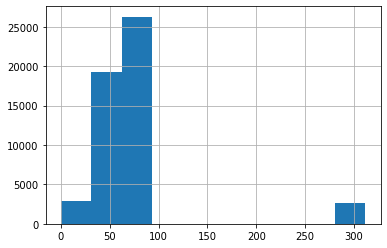

In [357]:
admissions_diagnosis_newborn_df["age_extract_precise"].hist();

In [434]:
indices = []
for idx,row in enumerate(admissions_diagnosis_newborn_df.itertuples(),1):
    if float(row.age_extract_precise) > 300.0:
        indices.append(idx)

In [435]:
len(indices)

2616

In [415]:
indices[0]

8

In [436]:
admissions_diagnosis_newborn_df["age_extract_precise"].median()

65.4901464209226

In [401]:
admissions_diagnosis_newborn_df["age_extract_precise"].isna()

0        False
1        False
2        False
3        False
4        False
5        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
21       False
22       False
23       False
24       False
25       False
26       False
28       False
29       False
30       False
31       False
32       False
         ...  
58946    False
58947    False
58948    False
58949    False
58950    False
58951    False
58952    False
58953    False
58954    False
58955    False
58956    False
58957    False
58958    False
58959    False
58960    False
58961    False
58962    False
58963    False
58964    False
58965    False
58966    False
58967    False
58968    False
58969    False
58970    False
58971    False
58972    False
58973    False
58974    False
58975    False
Name: age_extract_precise, Length: 51113, dtype: bool

In [402]:
admissions_diagnosis_newborn_df["age_extract_precise"].iloc[7]

300.002696663671

In [437]:
ages_list = admissions_diagnosis_newborn_df["age_extract_precise"].tolist()

In [438]:
for i in indices:
    ages_list[i-1] = 89.0

In [439]:
len(ages_list)

51113

In [440]:
admissions_diagnosis_newborn_df["age_extract_precise"].shape

(51113,)

In [441]:
df_ages_new = pd.DataFrame(ages_list)

In [442]:
df_ages_new.rename(columns={0:"ages"},inplace=True)

In [443]:
df_ages_new = df_ages_new.fillna(65.5)

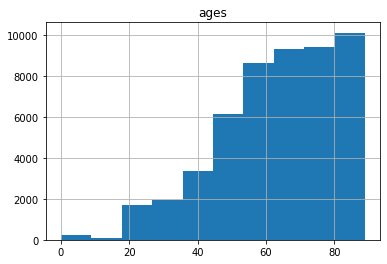

In [444]:
df_ages_new.hist();

In [376]:
df_ages_new["ages"].value_counts()

89.000000    2616
0.015634       10
0.012782       10
0.010044        8
0.015863        7
0.015749        6
0.012668        5
0.013354        5
0.015520        5
59.169790       4
65.752871       4
0.018143        4
0.010387        4
61.960179       4
0.015977        4
0.013125        4
0.012896        4
0.002402        4
76.619182       4
57.532519       3
81.268269       3
0.007192        3
56.421042       3
43.963548       3
83.072552       3
57.149212       3
72.634835       3
54.375708       3
61.276616       3
68.611250       3
             ... 
69.096318       1
70.152580       1
60.339908       1
39.163075       1
56.810969       1
61.843364       1
81.452281       1
74.574877       1
76.035778       1
75.863404       1
52.245614       1
64.866475       1
40.814836       1
52.322618       1
56.941245       1
55.192864       1
57.550091       1
57.090007       1
57.917200       1
55.094757       1
84.382409       1
65.495737       1
66.224585       1
87.248323       1
72.614419 

In [427]:
df_ages_new.tail()

,ages
51108,19.400500
51109,83.453808
51110,42.531506
51111,60.768158
51112,63.719740


In [445]:
df_ages_new.shape

(51113, 1)

In [446]:
admissions_diagnosis_newborn_df.reset_index(drop=True,inplace=True)

In [447]:
admissions_diagnosis_newborn_df = pd.concat([admissions_diagnosis_newborn_df,df_ages_new],axis=1)

In [448]:
admissions_diagnosis_newborn_df.tail()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,BOWEL OBSTRUCTION,CELLULITIS,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages
51108,98800,191113,2.742361,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,19.400500
51109,98802,101071,0.548611,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,83.453808
51110,98805,122631,8.203472,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.531506
51111,98813,170407,41.445833,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,60.768158
51112,98813,190264,1.607639,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,63.719740


In [380]:
admissions_diagnosis_newborn_df.shape

(58976, 74)

In [381]:
admissions_diagnosis_newborn_df["heart_rate_bps"].isna()

0        False
1        False
2        False
3         True
4        False
5        False
6         True
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20        True
21       False
22       False
23       False
24       False
25       False
26       False
27        True
28       False
29       False
         ...  
58946    False
58947    False
58948    False
58949     True
58950    False
58951    False
58952    False
58953    False
58954    False
58955    False
58956    False
58957    False
58958    False
58959    False
58960    False
58961    False
58962     True
58963     True
58964    False
58965    False
58966    False
58967    False
58968    False
58969    False
58970    False
58971    False
58972    False
58973    False
58974     True
58975    False
Name: heart_rate_bps, Length: 58976, dtype: bool

In [384]:
admissions_diagnosis_newborn_df["temperature_F"].isna()

0        False
1        False
2        False
3        False
4        False
5        False
6         True
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15        True
16       False
17       False
18       False
19       False
20        True
21       False
22       False
23       False
24       False
25       False
26       False
27        True
28       False
29       False
         ...  
58946    False
58947    False
58948    False
58949     True
58950    False
58951    False
58952    False
58953    False
58954    False
58955    False
58956    False
58957    False
58958    False
58959    False
58960    False
58961    False
58962     True
58963     True
58964    False
58965    False
58966    False
58967    False
58968    False
58969    False
58970    False
58971    False
58972    False
58973    False
58974     True
58975    False
Name: temperature_F, Length: 58976, dtype: bool

In [449]:
df_temp_corrected = admissions_diagnosis_newborn_df["temperature_F"].fillna(98.6)

In [451]:
df_temp_corrected = df_temp_corrected.to_frame()

In [386]:
df_temp_corrected.head(10)

0    98.5
1    98.1
2    98.4
3    97.6
4    97.0
5    99.7
6    98.6
7    98.6
8    97.2
9    96.1
Name: temperature_F, dtype: float64

In [452]:
admissions_diagnosis_newborn_df["heart_rate_bps"].median()

84.0

In [453]:
df_heart_rate_corrected = admissions_diagnosis_newborn_df["heart_rate_bps"].fillna(84.0)

In [454]:
df_heart_rate_corrected = df_heart_rate_corrected.to_frame()

In [455]:
admissions_diagnosis_newborn_df.tail()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,BOWEL OBSTRUCTION,CELLULITIS,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages
51108,98800,191113,2.742361,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,19.400500
51109,98802,101071,0.548611,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,83.453808
51110,98805,122631,8.203472,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.531506
51111,98813,170407,41.445833,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,60.768158
51112,98813,190264,1.607639,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,63.719740


### Get rid of age_extract_precise and old temperature and heart rate

In [457]:
admissions_diagnosis_newborn_df.drop(columns="age_extract_precise",inplace=True)

In [456]:
admissions_diagnosis_newborn_df.drop(columns=["temperature_F","heart_rate_bps"],inplace=True)

## ADD CORRECTED TEMPS AND HEART RATE

In [458]:
admissions_diagnosis_newborn_df = pd.concat([admissions_diagnosis_newborn_df,df_temp_corrected,df_heart_rate_corrected],axis=1)

In [459]:
admissions_diagnosis_newborn_df.shape

(51113, 73)

In [460]:
admissions_diagnosis_newborn_df.tail()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps
51108,98800,191113,2.742361,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,19.400500,99.1,123.0
51109,98802,101071,0.548611,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,83.453808,97.8,86.0
51110,98805,122631,8.203472,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42.531506,99.0,120.0
51111,98813,170407,41.445833,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,60.768158,98.6,84.0
51112,98813,190264,1.607639,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,63.719740,98.2,113.0


In [474]:
ADMISSIONS_CDiff_pos_df = admissions_diagnosis_newborn_df.head(1).copy()
ADMISSIONS_CDiff_pos_df.drop([0],inplace=True)
ADMISSIONS_CDiff_neg_df = ADMISSIONS_CDiff_pos_df.copy()

for row in DIAGNOSES_ICD_df.itertuples():
    #C. Diff. has ICD9 Code 00845
    if row.ICD9_CODE == '00845':
        #print(row.SUBJECT_ID,row.HADM_ID,row.ICD9_CODE)
        subject_id = row.SUBJECT_ID
        hadm_id = row.HADM_ID
        ADMISSIONS_CDiff_pos_df = ADMISSIONS_CDiff_pos_df.append(admissions_diagnosis_newborn_df.loc[(admissions_diagnosis_newborn_df['SUBJECT_ID'] == subject_id) & (admissions_diagnosis_newborn_df['HADM_ID'] == hadm_id)])
        

In [475]:
ADMISSIONS_CDiff_pos_df.head()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps
192,21,111970,8.220833,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,87.826251,97.6,78.0
399,195,118936,23.829861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,74.333369,96.7,92.0
446,243,129066,9.201389,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,42.756816,97.0,80.0
461,256,153771,6.546528,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,79.974266,98.6,84.0
325,395,137967,12.786111,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,74.120834,99.5,98.0


In [476]:
ADMISSIONS_CDiff_neg_df = pd.concat([admissions_diagnosis_newborn_df,ADMISSIONS_CDiff_pos_df]).drop_duplicates(keep=False)

In [477]:
ADMISSIONS_CDiff_neg_df.shape

(49669, 73)

In [478]:
ADMISSIONS_CDiff_pos_df.shape

(1444, 73)

In [479]:
ADMISSIONS_CDiff_pos_df["target"]=1
ADMISSIONS_CDiff_neg_df["target"]=0

# EDA

In [ ]:
cdiff_pos_preprocess
cdiff_neg_preprocess

In [92]:
import matplotlib.lines as mlines

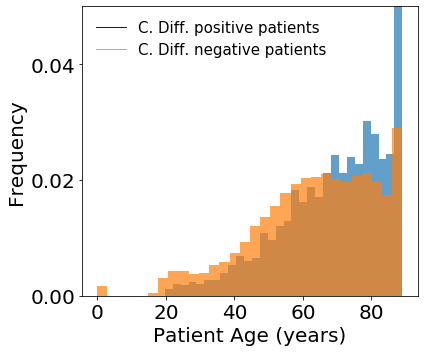

In [99]:
ax = plt.gca()
cdiff_pos_preprocess["ages"].hist(bins=30, alpha=0.7, ax=ax, density=True,grid=False);
cdiff_neg_preprocess["ages"].hist(bins=30,alpha=0.7, ax=ax, density=True,grid=False);
#create symbols for legend
cdiff_pos = mlines.Line2D([], [], c='b', lw=1.0, label = 'C. Diff. positive patients');
cdiff_neg = mlines.Line2D([], [], c='orange', lw=1.0, label='C. Diff. negative patients')
plt.legend(handles=[cdiff_pos,cdiff_neg],frameon=False,fontsize=15);
plt.xticks([0,20,40,60,80],fontsize=20);
plt.ylim(0.0,0.05);
plt.yticks([0.0,0.02,0.04],fontsize=20);
plt.xlabel('Patient Age (years)',fontsize=20);
plt.ylabel('Frequency',fontsize=20);
plt.rcParams["figure.figsize"] = [6.0,5.020];
plt.tight_layout();
plt.savefig("./week_3/age_comparison.jpg",dpi=300)

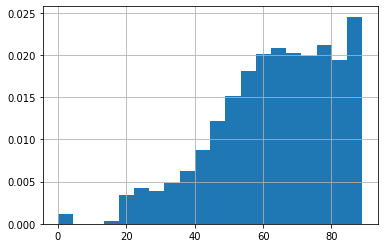

In [43]:
cdiff_neg_preprocess["ages"].hist(density=True,bins=20);

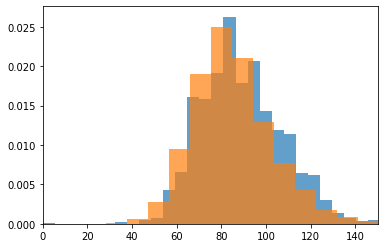

In [70]:
ax = plt.gca()
cdiff_pos_preprocess["heart_rate_bps"].hist(density=True,bins=30,alpha=0.7, ax=ax,grid=False);
cdiff_neg_preprocess["heart_rate_bps"].hist(density=True,bins=100,alpha=0.7, ax=ax, grid=False);
plt.xlim(0,150);

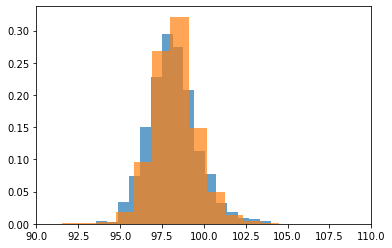

In [72]:
ax = plt.gca()
cdiff_pos_preprocess["temperature_F"].hist(density=True,bins=100,alpha=0.7, ax=ax,grid=False);
cdiff_neg_preprocess["temperature_F"].hist(density=True,bins=100,alpha=0.7, ax=ax, grid=False);
plt.xlim(90,110);


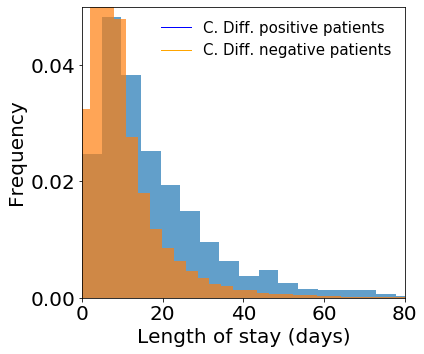

In [101]:
ax = plt.gca()
cdiff_pos_preprocess["LOS"].hist(density=True,bins=30,alpha=0.7, ax=ax,grid=False);
cdiff_neg_preprocess["LOS"].hist(density=True,bins=100,alpha=0.7, ax=ax,grid=False);
plt.xlim(0,60);
#create symbols for legend
cdiff_pos = mlines.Line2D([], [], c='b', lw=1.0, label = 'C. Diff. positive patients');
cdiff_neg = mlines.Line2D([], [], c='orange', lw=1.0, label='C. Diff. negative patients')
plt.legend(handles=[cdiff_pos,cdiff_neg],frameon=False,fontsize=15);
plt.xticks([0,20,40,60,80],fontsize=20);
plt.ylim(0.0,0.05);
plt.yticks([0.0,0.02,0.04],fontsize=20);
plt.xlabel('Length of stay (days)',fontsize=20);
plt.ylabel('Frequency',fontsize=20)
plt.rcParams["figure.figsize"] = [6.0,5.020];
plt.tight_layout();
plt.savefig("./week_3/lengh_of_stay.jpg",dpi=300)

In [76]:
corr_cdiff_neg = cdiff_neg_preprocess.corr()
corr_cdiff_neg.style.background_gradient(cmap='coolwarm')

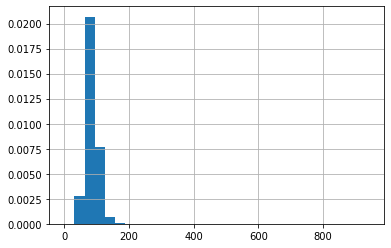

In [57]:
cdiff_neg_preprocess["heart_rate_bps"].hist(density=True,bins=30);

In [47]:
cdiff_neg_preprocess["temperature_F"].max()

107.7

# OK let's preprocess for training, cross-validation, and testing

In [480]:
ADMISSIONS_CDiff_preprocess = pd.concat([ADMISSIONS_CDiff_pos_df,ADMISSIONS_CDiff_neg_df],ignore_index=True)

In [482]:
ADMISSIONS_CDiff_preprocess.head()

,SUBJECT_ID,HADM_ID,LOS,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,...,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps,target
0,21,111970,8.220833,0,1,0,0,0,0,1,...,0,0,0,0,0,0,87.826251,97.6,78.0,1
1,195,118936,23.829861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,74.333369,96.7,92.0,1
2,243,129066,9.201389,0,1,0,0,0,0,0,...,0,0,0,0,0,0,42.756816,97.0,80.0,1
3,256,153771,6.546528,0,1,0,0,0,0,1,...,0,0,0,0,0,0,79.974266,98.6,84.0,1
4,395,137967,12.786111,0,1,0,0,0,0,1,...,0,0,0,0,0,0,74.120834,99.5,98.0,1


In [484]:
ADMISSIONS_CDiff_preprocess.to_csv("./data/dataframes/admissions_cdiff_preprocess.csv")

In [8]:
ADMISSIONS_CDiff_preprocess = pd.read_csv("./data/dataframes/admissions_cdiff_preprocess.csv",index_col=0)

In [9]:
ADMISSIONS_CDiff_preprocess.drop(columns=["SUBJECT_ID","HADM_ID"],inplace=True)

In [10]:
ADMISSIONS_CDiff_preprocess.drop(columns=["NEWBORN"],inplace=True)

In [11]:
ADMISSIONS_CDiff_preprocess.head()

,LOS,ELECTIVE,EMERGENCY,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps,target
0,8.220833,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,87.826251,97.6,78.0,1
1,23.829861,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,74.333369,96.7,92.0,1
2,9.201389,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,42.756816,97.0,80.0,1
3,6.546528,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,79.974266,98.6,84.0,1
4,12.786111,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,74.120834,99.5,98.0,1


In [12]:
cdiff_pos_preprocess = ADMISSIONS_CDiff_preprocess.loc[ADMISSIONS_CDiff_preprocess['target'] == 1]
cdiff_neg_preprocess = ADMISSIONS_CDiff_preprocess.loc[ADMISSIONS_CDiff_preprocess['target'] == 0]

In [13]:
cdiff_pos_preprocess_inputs = cdiff_pos_preprocess.loc[:,cdiff_pos_preprocess.columns != 'target']
cdiff_neg_preprocess_inputs = cdiff_neg_preprocess.loc[:,cdiff_neg_preprocess.columns != 'target']

In [31]:
cdiff_pos_preprocess_inputs.head()

,LOS,ELECTIVE,EMERGENCY,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps
0,8.220833,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,87.826251,97.6,78.0
1,23.829861,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,74.333369,96.7,92.0
2,9.201389,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,42.756816,97.0,80.0
3,6.546528,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,79.974266,98.6,84.0
4,12.786111,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,74.120834,99.5,98.0


In [18]:
cdiff_pos_preprocess.tail()

,LOS,ELECTIVE,EMERGENCY,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps,target
1439,7.568056,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,75.755596,96.3,95.0,1
1440,8.199306,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,75.726623,100.6,102.0,1
1441,9.909722,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,77.660160,98.9,73.0,1
1442,4.466667,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,65.499268,98.0,85.0,1
1443,10.110417,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,74.116502,98.4,81.0,1


In [9]:
df_for_app = ADMISSIONS_CDiff_preprocess.loc[:,ADMISSIONS_CDiff_preprocess.columns != 'target'].head(1)

In [10]:
df_for_app

,LOS,ELECTIVE,EMERGENCY,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,RENAL FAILURE,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps
0,8.220833,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,87.826251,97.6,78.0


In [11]:
df_for_app.to_csv("./data/df_for_app_ver2.csv")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
admissions_cdiff_logreg_balanced_df = ADMISSIONS_CDiff_preprocess.head(1444*2)

In [14]:
admissions_cdiff_preprocess_shuffled_df = ADMISSIONS_CDiff_preprocess.sample(frac=1).reset_index(drop=True)

In [16]:
admissions_cdiff_preprocess_shuffled_df.head()

,LOS,ELECTIVE,EMERGENCY,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,CHOLECYSTITIS,LIVER FAILURE,BLUNT TRAUMA,ABDOMINAL AORTIC ANEURYSM,PANCREATIC MASS/SDA,ACUTE LEUKEMIA,ages,temperature_F,heart_rate_bps,target
0,7.801389,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,75.910520,97.8,96.0,0
1,14.223611,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,66.069897,99.5,80.0,0
2,1.028472,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,55.931871,97.2,132.0,0
3,8.454167,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,58.663277,99.4,110.0,0
4,11.034028,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,72.134484,98.9,45.0,0


In [22]:
#tree regressions
X_tree = admissions_cdiff_preprocess_shuffled_df.loc[:, admissions_cdiff_preprocess_shuffled_df.columns != 'target']
y_tree = admissions_cdiff_preprocess_shuffled_df.loc[:, admissions_cdiff_preprocess_shuffled_df.columns == 'target']

In [18]:
#logistic regressions
admissions_cdiff_logreg_balanced_shuffled_df = admissions_cdiff_logreg_balanced_df.sample(frac=1).reset_index(drop=True)
X_logreg = admissions_cdiff_logreg_balanced_shuffled_df.loc[:, admissions_cdiff_logreg_balanced_shuffled_df.columns != 'target']
y_logreg = admissions_cdiff_logreg_balanced_shuffled_df.loc[:, admissions_cdiff_logreg_balanced_shuffled_df.columns == 'target']

In [15]:
#logistic regression take 2
X_logreg2 = admissions_cdiff_preprocess_shuffled_df.loc[:, admissions_cdiff_preprocess_shuffled_df.columns != 'target']
y_logreg2 = admissions_cdiff_preprocess_shuffled_df.loc[:, admissions_cdiff_preprocess_shuffled_df.columns == 'target']

In [19]:
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_logreg, y_logreg, test_size=0.3, random_state=0)

In [16]:
X_train_logreg2, X_test_logreg2, y_train_logreg2, y_test_logreg2 = train_test_split(X_logreg2, y_logreg2, test_size=0.3, random_state=0)

In [20]:
logistic_regressor = LogisticRegression(C=0.5,penalty='l1')
logistic_regressor.fit(X_train_logreg.to_numpy(), y_train_logreg["target"].tolist())
y_pred_logreg = logistic_regressor.predict(X_test_logreg)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
logistic_regressor2 = LogisticRegression(C=0.5,penalty='l1',class_weight='balanced',max_iter=1000)
logistic_regressor2.fit(X_train_logreg2.to_numpy(), y_train_logreg2["target"].tolist())
y_pred_logreg2 = logistic_regressor2.predict(X_test_logreg2)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [513]:
roc_auc_score(y_test_logreg, y_pred_logreg)

0.7076030708292516

In [20]:
roc_auc_score(y_test_logreg2, y_pred_logreg2)

0.7081404059363701

In [21]:
print(logistic_regressor.coef_)

[[ 0.05738183  0.          0.59537144  0.          0.          0.16639279
  -0.86365233  0.         -0.78568451 -0.25576422  0.          0.
   0.          0.          0.32209337 -0.03238483 -0.45180736  0.22137377
   1.30634306  0.66041197  1.06288603  0.          0.71168049  0.0432902
   0.31302278  2.05643342  0.          0.25148835 -0.21842907  0.
   0.          0.14893992  0.82144108 -0.23144344 -1.01391967  1.32675585
   0.41506291  0.          0.4774672   0.          0.          0.
   0.3695665   0.5349165   0.          0.          0.          0.
   0.          0.         -0.42963068  0.1512249   0.          0.
   0.          0.          0.         -0.15587391  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.03152659 -0.04654574  0.01766745]]


In [23]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=0)

In [51]:
random_forest_clf=RandomForestClassifier(n_estimators=100,max_depth=3,class_weight='balanced')
random_forest_clf.fit(X_train_tree.to_numpy(),y_train_tree["target"].tolist())
y_pred_tree=random_forest_clf.predict(X_test_tree)

In [52]:
roc_auc_score(y_test_tree, y_pred_tree)

0.6919667761730615

In [25]:
features_names = list(X_train_tree.columns)

In [26]:
for feature in zip(features_names, random_forest_clf.feature_importances_):
    print(feature)

('LOS', 0.38377081824324094)
('ELECTIVE', 0.03554698347557708)
('EMERGENCY', 0.030268917397426855)
('URGENT', 0.0046222978963572055)
('** INFO NOT AVAILABLE **', 0.00020139596801424658)
('CLINIC REFERRAL/PREMATURE', 0.00844741021461883)
('EMERGENCY ROOM ADMIT', 0.008087666563920735)
('HMO REFERRAL/SICK', 0.0)
('PHYS REFERRAL/NORMAL DELI', 0.03776617878151125)
('TRANSFER FROM HOSP/EXTRAM', 0.006989699017365007)
('TRANSFER FROM OTHER HEALT', 0.003741154678722252)
('TRANSFER FROM SKILLED NUR', 0.0016954576441330837)
('TRSF WITHIN THIS FACILITY', 0.0)
('ASIAN', 0.0034036619602985786)
('BLACK', 0.005181041257363204)
('HISPANIC', 0.005537928449243087)
('OTHER', 0.009359446924913487)
('WHITE', 0.011661929934459012)
('SEPSIS', 0.03936622280125121)
('PNEUMONIA', 0.008598934561144236)
('FEVER', 0.004864186569605619)
('CONGESTIVE HEART FAILURE', 0.0017309457780698013)
('HYPOTENSION', 0.008914837805573252)
('ABDOMINAL PAIN', 0.00372242431051616)
('ALTERED MENTAL STATUS', 0.0017045434478587104)
('C

In [24]:
from imblearn.under_sampling import RandomUnderSampler as UnderSampler

In [25]:
sampler = UnderSampler()
X_tree_balanced, y_tree_balanced = sampler.fit_sample(X_train_tree.to_numpy(),y_train_tree["target"].tolist())

In [53]:
import numpy as np
np.bincount(y_tree_balanced)

array([1009, 1009])

In [540]:
random_forest_gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=10)
random_forest_gb_clf.fit(X_train_logreg.to_numpy(),y_train_logreg["target"].tolist())
y_pred_gb_tree=random_forest_gb_clf.predict(X_test_tree)

In [35]:
random_forest_gb_clf2=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3)
random_forest_gb_clf2.fit(X_tree_balanced,y_tree_balanced)
y_pred_gb_tree2=random_forest_gb_clf2.predict(X_test_tree)

In [541]:
roc_auc_score(y_test_tree, y_pred_gb_tree)

0.7752322406767572

In [36]:
roc_auc_score(y_test_tree, y_pred_gb_tree2)

0.7168768982830224

## CROSS-VALIDATE GRADIENT BOOST CLASSIFIER/LOGISTIC REGRESSION

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [88]:
# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': [3, 5, 10, 15]}]

scores = ['precision_macro', 'recall_macro','roc_auc']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(GradientBoostingClassifier(learning_rate=0.2,n_estimators=25), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(X_tree_balanced, y_tree_balanced)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_tree, clf.predict(X_test_tree)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

0.697 (+/-0.032) for {'max_depth': 3}
0.692 (+/-0.042) for {'max_depth': 5}
0.666 (+/-0.037) for {'max_depth': 10}
0.659 (+/-0.039) for {'max_depth': 15}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.99      0.68      0.81     14899
           1       0.06      0.70      0.11       435

    accuracy                           0.68     15334
   macro avg       0.52      0.69      0.46     15334
weighted avg       0.96      0.68      0.79     15334


# Tuning hyper-parameters for recall_macro

Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

0.696 (+/-0.029) for {'max_depth': 3}
0.693 (+/-0.037) for {'max_depth': 5}
0.670 (+/-0.044) f

In [63]:
roc_auc_df = pd.DataFrame(index=[0.01,0.03,0.1,0.2],columns=[3,5,10,15])

In [90]:
roc_auc_df

,3,5,10,15
0.01,0.77,0.76,0.738,0.711
0.03,0.77,0.76,0.738,0.711
0.10,0.77,0.758,0.736,0.71
0.20,0.77,0.76,0.74,0.72


In [89]:



roc_auc_df.iloc[3] = [0.77,0.76,0.74,0.72]

In [66]:
precision_df = pd.DataFrame(index=[0.01,0.03,0.1,0.2],columns=[3,5,10,15])

In [92]:
precision_df

,3,5,10,15
0.01,0.71,0.7,0.68,0.65
0.03,0.7,0.69,0.679,0.65
0.10,0.7,0.69,0.679,0.647
0.20,0.7,0.7,0.67,0.66


In [91]:
precision_df.iloc[3] = [0.70,0.7,0.67,0.66]

In [70]:
recall_df = pd.DataFrame(index=[0.01,0.03,0.1,0.2],columns=[3,5,10,15])

In [94]:
recall_df

,3,5,10,15
0.01,0.7,0.7,0.68,0.65
0.03,0.698,0.69,0.68,0.65
0.10,0.698,0.69,0.67,0.65
0.20,0.7,0.7,0.67,0.66


In [93]:
recall_df.iloc[3] = [0.7,0.7,0.67,0.66]

## Let's look at ROC Curve for optimal parameters (learning rate=0.1,max_depth=3,n_estimators=50)

In [37]:
random_forest_gb_auc_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3)
random_forest_gb_auc_clf.fit(X_tree_balanced,y_tree_balanced)
y_pred_gb_tree=random_forest_gb_auc_clf.predict(X_test_tree)

In [122]:
joblib.dump(random_forest_gb_auc_clf,"./models/gb_random_forest_auc_070.mdl")

['./models/gb_random_forest_auc_070.mdl']

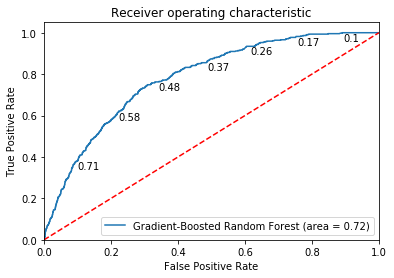

In [38]:
logit_roc_auc = roc_auc_score(y_test_tree, y_pred_gb_tree)
fpr,tpr, thresholds = roc_curve(y_test_tree, random_forest_gb_auc_clf.predict_proba(X_test_tree)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient-Boosted Random Forest (area = %0.2f)' % logit_roc_auc)
for x, y, txt in zip(fpr[::500], tpr[::500], thresholds[::500]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_3/GB_Random_Forest_ROC.jpg')
plt.show()

In [114]:
clf = GridSearchCV(GradientBoostingClassifier(learning_rate=0.1,n_estimators=50), {'max_depth': [3]}, cv=5,
                       scoring='%s' % score)
clf.fit(X_tree_balanced, y_tree_balanced)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
                                                  presort='

In [115]:
y_true, y_pred = y_test_tree, clf.predict(X_test_tree)

In [116]:
roc_auc_score(y_test_tree,y_pred)

0.6968983492682145

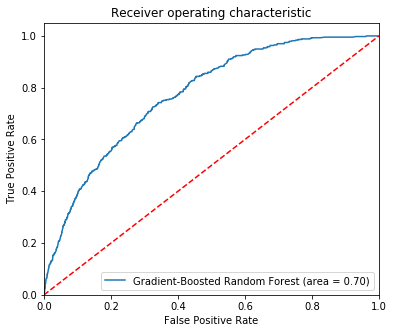

In [118]:
logit_roc_auc = roc_auc_score(y_test_tree, y_pred)
fpr,tpr, thresholds = roc_curve(y_test_tree, clf.predict_proba(X_test_tree)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient-Boosted Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_3/GB_Random_Forest_ROC_2.jpg')
plt.show()

In [119]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.03,0.1, 0.3, 1]}]

scores = ['precision_macro', 'recall_macro','roc_auc']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(penalty='l1',class_weight='balanced',max_iter=1000), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train_logreg2.to_numpy(), y_train_logreg2["target"].tolist())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_logreg2, clf.predict(X_test_logreg2)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision_macro



/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-pa

Best parameters set found on development set:

{'C': 0.1}

Grid scores on development set:

0.529 (+/-0.002) for {'C': 0.03}
0.530 (+/-0.003) for {'C': 0.1}
0.529 (+/-0.003) for {'C': 0.3}
0.529 (+/-0.004) for {'C': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     14899
           1       0.07      0.68      0.13       435

    accuracy                           0.74     15334
   macro avg       0.53      0.71      0.49     15334
weighted avg       0.96      0.74      0.83     15334


# Tuning hyper-parameters for recall_macro



/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-pa

Best parameters set found on development set:

{'C': 0.03}

Grid scores on development set:

0.715 (+/-0.016) for {'C': 0.03}
0.712 (+/-0.012) for {'C': 0.1}
0.709 (+/-0.015) for {'C': 0.3}
0.707 (+/-0.025) for {'C': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     14899
           1       0.07      0.67      0.13       435

    accuracy                           0.74     15334
   macro avg       0.53      0.71      0.49     15334
weighted avg       0.96      0.74      0.83     15334


# Tuning hyper-parameters for roc_auc



/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-pa

Best parameters set found on development set:

{'C': 0.3}

Grid scores on development set:

0.782 (+/-0.012) for {'C': 0.03}
0.784 (+/-0.016) for {'C': 0.1}
0.784 (+/-0.018) for {'C': 0.3}
0.784 (+/-0.019) for {'C': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     14899
           1       0.07      0.67      0.13       435

    accuracy                           0.74     15334
   macro avg       0.53      0.71      0.49     15334
weighted avg       0.96      0.74      0.83     15334




In [18]:
#C=0.03-1,auc is 0.78
logistic_regressor_cv = LogisticRegression(C=0.3,penalty='l1',class_weight='balanced',max_iter=1000)
logistic_regressor_cv.fit(X_train_logreg2.to_numpy(), y_train_logreg2["target"].tolist())
y_pred_logreg = logistic_regressor_cv.predict(X_test_logreg2)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


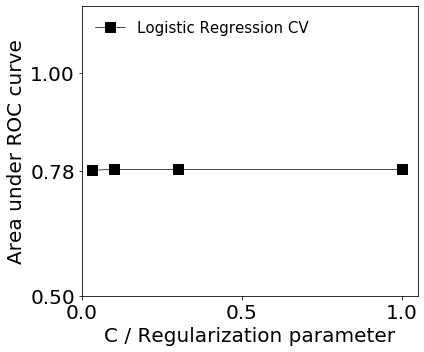

In [96]:
logit_roc_auc = roc_auc_score(y_test_logreg2, y_pred_logreg)
fpr,tpr, thresholds = roc_curve(y_test_logreg2, logistic_regressor_cv.predict_proba(X_test_logreg2)[:,1])
plt.figure()
plt.plot([0.03,0.1,0.3,1],[0.782,0.784,0.784,0.784], c='k',lw=0.7,marker="s",ms=10,label='Logistic Regression CV')
plt.xticks([0.0,0.5, 1.0],fontsize=20)
plt.yticks([0.0,0.5,0.78,1.0],fontsize=20)
plt.xlim([0.0, 1.05])
plt.ylim([0.5, 1.15])
plt.xlabel('C / Regularization parameter',fontsize=20)
plt.ylabel('Area under ROC curve',fontsize=20)
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
plt.legend(frameon=False,loc="upper left",fontsize=15)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_4/Logistic_Regression_CV.jpg')
plt.show()

In [ ]:
plt.figure()
plt.plot(fpr, tpr, c='magenta',lw=3.0,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
for x, y, txt in zip(fpr[::100], tpr[::100], thresholds[::100]):
    plt.annotate(np.round(txt,2), (x, y-0.06),fontsize=15)
plt.plot([0, 1], [0, 1],'k--')
plt.xticks([0.0,0.5,1.0],fontsize=20)
plt.yticks([0.0,0.5,1.0],fontsize=20)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.15])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
plt.legend(frameon=False,loc="upper left",fontsize=15)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_3/Logistic_Regression_ROC.jpg')
plt.show()

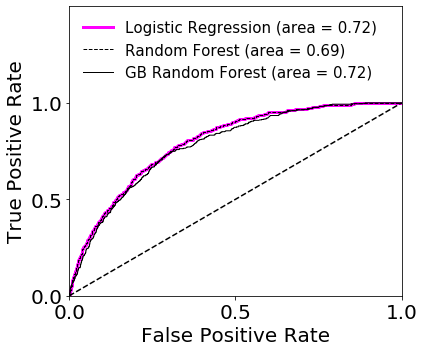

In [55]:
logit_roc_auc = roc_auc_score(y_test_logreg2, y_pred_logreg)
logit_roc_auc2 = roc_auc_score(y_test_tree, y_pred_tree)
logit_roc_auc3 = roc_auc_score(y_test_tree, y_pred_gb_tree)
fpr,tpr, thresholds = roc_curve(y_test_logreg2, logistic_regressor_cv.predict_proba(X_test_logreg2)[:,1])
fpr2,tpr2,thresholds2 = roc_curve(y_test_tree, random_forest_clf.predict_proba(X_test_tree)[:,1])
fpr3,tpr3, thresholds3 = roc_curve(y_test_tree, random_forest_gb_auc_clf.predict_proba(X_test_tree)[:,1])
plt.figure()
plt.plot(fpr, tpr, c='magenta',lw=3.0,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr,tpr,c='black',lw=1.0,ls='--',label='Random Forest (area = %0.2f)' % logit_roc_auc2)
plt.plot(fpr3, tpr3, c='black',lw=1.0,label='GB Random Forest (area = %0.2f)' % logit_roc_auc3)
#for x, y, txt in zip(fpr[::100], tpr[::100], thresholds[::100]):
#    plt.annotate(np.round(txt,2), (x, y-0.06),fontsize=15)
plt.plot([0, 1], [0, 1],'k--')
plt.xticks([0.0,0.5,1.0],fontsize=20)
plt.yticks([0.0,0.5,1.0],fontsize=20)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
plt.legend(frameon=False,loc="upper left",fontsize=15)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_4/Logistic_Regression_RF_GBRF_AUCROC.jpg')
plt.show()

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

In [103]:
# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': [3, 5, 10, 15],'n_estimators':[10,50,100,500]}]

scores = ['average_precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(GradientBoostingClassifier(learning_rate=0.1), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train_logreg.to_numpy(), y_train_logreg["target"].tolist())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_tree, clf.predict(X_test_tree)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for average_precision

Best parameters set found on development set:

{'max_depth': 3, 'n_estimators': 100}

Grid scores on development set:

0.727 (+/-0.033) for {'max_depth': 3, 'n_estimators': 10}
0.771 (+/-0.040) for {'max_depth': 3, 'n_estimators': 50}
0.779 (+/-0.035) for {'max_depth': 3, 'n_estimators': 100}
0.772 (+/-0.048) for {'max_depth': 3, 'n_estimators': 500}
0.735 (+/-0.022) for {'max_depth': 5, 'n_estimators': 10}
0.763 (+/-0.047) for {'max_depth': 5, 'n_estimators': 50}
0.768 (+/-0.049) for {'max_depth': 5, 'n_estimators': 100}
0.765 (+/-0.051) for {'max_depth': 5, 'n_estimators': 500}
0.718 (+/-0.034) for {'max_depth': 10, 'n_estimators': 10}
0.743 (+/-0.049) for {'max_depth': 10, 'n_estimators': 50}
0.743 (+/-0.060) for {'max_depth': 10, 'n_estimators': 100}
0.753 (+/-0.039) for {'max_depth': 10, 'n_estimators': 500}
0.673 (+/-0.056) for {'max_depth': 15, 'n_estimators': 10}
0.718 (+/-0.011) for {'max_depth': 15, 'n_estimators': 50}
0.735 (+

In [106]:
random_forest_gb_pre_rec_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3)
random_forest_gb_pre_rec_clf.fit(X_tree_balanced,y_tree_balanced)
#y_pred_gb_tree=random_forest_gb_pre_rec_clf.predict(X_test_tree)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

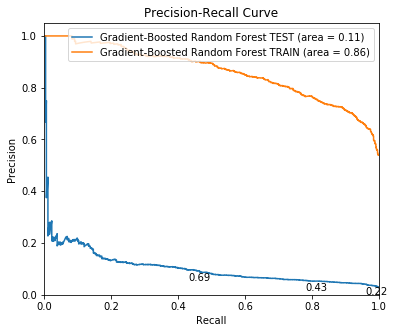

In [142]:
#logit_roc_auc = roc_auc_score(y_test_tree, y_pred_gb_tree)
precision,recall, thresholds = precision_recall_curve(y_test_tree, random_forest_gb_pre_rec_clf.predict_proba(X_test_tree)[:,1])
precision_train,recall_train, thresholds_train = precision_recall_curve(y_tree_balanced, random_forest_gb_pre_rec_clf.predict_proba(X_tree_balanced)[:,1])
plt.figure()
plt.plot(recall, precision, label='Gradient-Boosted Random Forest TEST (area = %0.2f)' % metrics.auc(recall,precision))
plt.plot(recall_train, precision_train, label='Gradient-Boosted Random Forest TRAIN (area = %0.2f)' % metrics.auc(recall_train,precision_train))
#plt.plot([0, 1], [0, 1],'r--')
for x, y, txt in zip(recall[::3000], precision[::3000], thresholds[::3000]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_3/GB_Random_Forest_precision_recall.jpg')
plt.show()

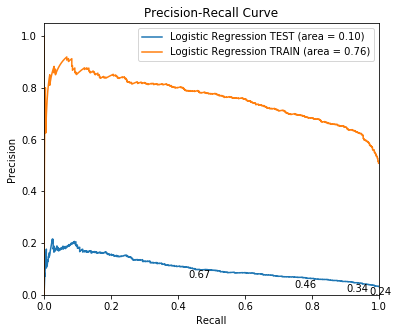

In [57]:
#logit_roc_auc = roc_auc_score(y_test_tree, y_pred_gb_tree)
precision,recall, thresholds = precision_recall_curve(y_test_logreg2, logistic_regressor_cv.predict_proba(X_test_logreg2)[:,1])
precision_train,recall_train, thresholds_train = precision_recall_curve(y_tree_balanced, logistic_regressor_cv.predict_proba(X_tree_balanced)[:,1])
plt.figure()
plt.plot(recall, precision, label='Logistic Regression TEST (area = %0.2f)' % metrics.auc(recall,precision))
plt.plot(recall_train, precision_train, label='Logistic Regression TRAIN (area = %0.2f)' % metrics.auc(recall_train,precision_train))
#plt.plot([0, 1], [0, 1],'r--')
for x, y, txt in zip(recall[::3000], precision[::3000], thresholds[::3000]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('./week_3/Logistic_regression_precision_recall.jpg')
plt.show()

In [65]:
sampler2 = UnderSampler(sampling_strategy=0.5)
X_tree_balanced2, y_tree_balanced2 = sampler2.fit_sample(X_train_tree.to_numpy(),y_train_tree["target"].tolist())

In [66]:
import numpy as np
np.bincount(y_tree_balanced2)

array([2004, 1002])

In [67]:
sampler10 = UnderSampler(sampling_strategy=0.1)
X_tree_balanced10, y_tree_balanced10 = sampler10.fit_sample(X_train_tree.to_numpy(),y_train_tree["target"].tolist())

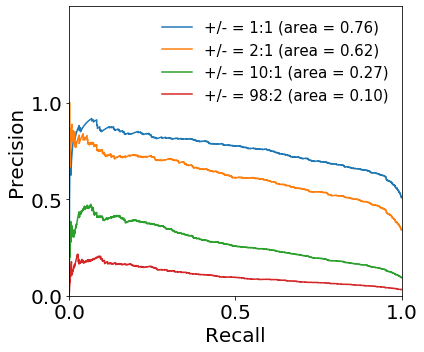

In [98]:
#logit_roc_auc = roc_auc_score(y_test_tree, y_pred_gb_tree)
precision_train,recall_train, thresholds_train = precision_recall_curve(y_tree_balanced, logistic_regressor_cv.predict_proba(X_tree_balanced)[:,1])
precision2,recall2, thresholds2 = precision_recall_curve(y_tree_balanced2, logistic_regressor_cv.predict_proba(X_tree_balanced2)[:,1])
precision10,recall10, thresholds10 = precision_recall_curve(y_tree_balanced10, logistic_regressor_cv.predict_proba(X_tree_balanced10)[:,1])
precision,recall, thresholds = precision_recall_curve(y_test_logreg2, logistic_regressor_cv.predict_proba(X_test_logreg2)[:,1])

plt.figure()
plt.plot(recall_train, precision_train, label='+/- = 1:1 (area = %0.2f)' % metrics.auc(recall_train,precision_train))
plt.plot(recall2, precision2, label='+/- = 2:1 (area = %0.2f)' % metrics.auc(recall2,precision2))
plt.plot(recall10, precision10, label='+/- = 10:1 (area = %0.2f)' % metrics.auc(recall10,precision10))
plt.plot(recall, precision, label='+/- = 98:2 (area = %0.2f)' % metrics.auc(recall,precision))

#plt.plot([0, 1], [0, 1],'r--')
#for x, y, txt in zip(recall[::3000], precision[::3000], thresholds[::3000]):
#    plt.annotate(np.round(txt,2), (x, y-0.04))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xticks([0.0,0.5,1.0],fontsize=20)
plt.yticks([0.0,0.5,1.0],fontsize=20)
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
#plt.title('Precision-Recall Curve')
plt.legend(loc="upper right",fontsize=15,frameon=False)
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.tight_layout()
plt.savefig('./week_4/Logistic_regression_precision_recall_detection_limit.jpg')
plt.show()

In [127]:
joblib.dump(logistic_regressor_cv,"./models/logistic_regression_auc_071.mdl")

['./models/logistic_regression_auc_071.mdl']

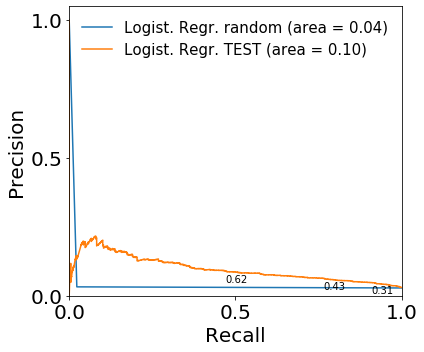

In [65]:
#logit_roc_auc = roc_auc_score(y_test_tree, y_pred_gb_tree)
precision_random,recall_random, thresholds_random = precision_recall_curve(y_test_logreg2, random_guess)
precision,recall, thresholds = precision_recall_curve(y_test_logreg2, logistic_regressor_cv.predict_proba(X_test_logreg2)[:,1])
precision_train,recall_train, thresholds_train = precision_recall_curve(y_tree_balanced, logistic_regressor_cv.predict_proba(X_tree_balanced)[:,1])
plt.figure()
plt.plot(recall_random, precision_random, label='Logist. Regr. random (area = %0.2f)' % metrics.auc(recall_random,precision_random))
plt.plot(recall, precision, label='Logist. Regr. TEST (area = %0.2f)' % metrics.auc(recall,precision))
#plt.plot(recall_train, precision_train, label='Logistic Regression TRAIN (area = %0.2f)' % metrics.auc(recall_train,precision_train))
#plt.plot([0, 1], [0, 1],'r--')
for x, y, txt in zip(recall[::3000], precision[::3000], thresholds[::3000]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.xticks([0,0.5,1.0],fontsize=20)
plt.yticks([0,0.5,1.0],fontsize=20)
#plt.title('Precision-Recall Curve')
plt.legend(loc="upper right",fontsize=15,frameon=False)
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.tight_layout()
plt.savefig('./week_4/Logistic_regression_precision_recall_vs_random.jpg')
plt.show()

In [53]:
y_test_logreg2.shape

(15334, 1)

In [54]:
random_guess = [0]*15334

In [55]:
import random

In [56]:
for idx,i in enumerate(random_guess):
    x = random.uniform(0,1)
    if x >= 0.98:
        random_guess[idx] = 1

In [57]:
float(sum(random_guess))/15334

0.020086083213773313

### IF TIME OPTIMIZE PRECISION-RECALL; BIAS PROBLEM!

In [128]:
precision,recall, thresholds

(array([0.03129496, 0.03122527, 0.03122751, ..., 0.        , 0.        ,
        1.        ]),
 array([1.        , 0.99770115, 0.99770115, ..., 0.        , 0.        ,
        0.        ]),
 array([0.12207757, 0.12212766, 0.12213537, ..., 0.9999751 , 0.99999835,
        0.99999999]))

## Let's try threshold of 0.7

### What are the important features in logistic regression?

In [152]:
features_names = list(X_train_tree.columns)
logistic_regression_coeffs = logistic_regressor_cv.coef_

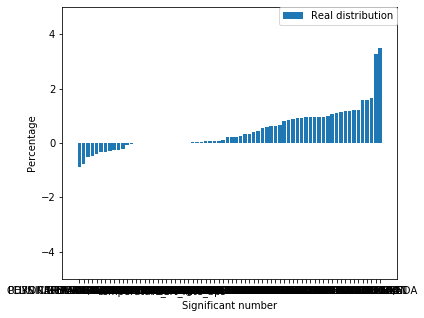

In [170]:
import operator
x = dict(zip(features_names,logistic_regression_coeffs[0]))
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
features = [item[0] for item in sorted_x]
coeffs = [item[1] for item in sorted_x]


plt.bar(features, coeffs , label="Real distribution")

plt.ylim(-5,5)
plt.ylabel ('Percentage')
plt.xlabel ('Significant number')
plt.xticks(list(keys))
plt.legend (bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.)

plt.show()

In [171]:
sorted_x

[('CORONARY ARTERY DISEASE', -0.8806314078717635),
 ('PHYS REFERRAL/NORMAL DELI', -0.783986271827311),
 ('CLINIC REFERRAL/PREMATURE', -0.5151165219065232),
 ('ASIAN', -0.46460917447750094),
 ('BLUNT TRAUMA', -0.3978561738691855),
 ('OTHER', -0.34058826600339676),
 ('HISPANIC', -0.3172368459956089),
 ('URGENT', -0.292445588375445),
 ('ELECTIVE', -0.2689376368100334),
 ('INTRACRANIAL HEMORRHAGE', -0.2665895171642046),
 ('EMERGENCY ROOM ADMIT', -0.23148579427427027),
 ('SUBDURAL HEMATOMA', -0.07070889127994903),
 ('UPPER GASTROINTESTINAL BLEED', -0.04813803513113641),
 ('temperature_F', -0.009939099950277381),
 ('LIVER FAILURE', -0.004338772185190344),
 ('EMERGENCY', 0.0),
 ('HMO REFERRAL/SICK', 0.0),
 ('TRANSFER FROM HOSP/EXTRAM', 0.0),
 ('TRANSFER FROM SKILLED NUR', 0.0),
 ('TRSF WITHIN THIS FACILITY', 0.0),
 ('WHITE', 0.0),
 ('CHEST PAIN', 0.0),
 ('TRANSIENT ISCHEMIC ATTACK', 0.0),
 ('SEIZURE', 0.0),
 ('CHOLECYSTITIS', 0.0),
 ('heart_rate_bps', 0.014768873292296055),
 ('ages', 0.025669

In [135]:
log_reg_feature_importance = pd.DataFrame({'feature':['Colitis','Diarrhea','Hypotension','Bacteremia','Sepsis','Fever','Transfer'],'weight':
                                                                                                                                   [3.51,3.27,1.66,1.57,1.57,1.10,1.0]})

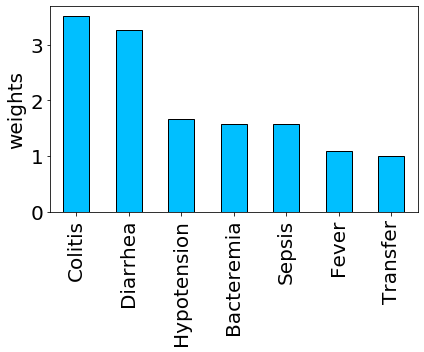

In [154]:
log_reg_feature_importance.plot(kind='bar',legend=None,x='feature',y='weight',facecolor='deepskyblue',edgecolor='black');
plt.xticks(fontsize=20)
plt.xlabel('');
plt.yticks([0.0,1.0,2.0,3.0],fontsize=20);
plt.ylabel('weights',fontsize=20);
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.tight_layout();
plt.savefig("./week_3/feature_importance_log_reg.pdf")

In [172]:
for feature in zip(features_names, random_forest_gb_pre_rec_clf.feature_importances_):
    print(feature)

('LOS', 0.4598113321685259)
('ELECTIVE', 0.0009230476400165081)
('EMERGENCY', 0.03158042672718585)
('URGENT', 2.6497696314485176e-06)
('** INFO NOT AVAILABLE **', 0.0)
('CLINIC REFERRAL/PREMATURE', 0.000895954805390505)
('EMERGENCY ROOM ADMIT', 0.004968850492006863)
('HMO REFERRAL/SICK', 0.0)
('PHYS REFERRAL/NORMAL DELI', 0.04104913138744505)
('TRANSFER FROM HOSP/EXTRAM', 0.000871916599105411)
('TRANSFER FROM OTHER HEALT', 0.0)
('TRANSFER FROM SKILLED NUR', 0.002545803702769645)
('TRSF WITHIN THIS FACILITY', 0.0)
('ASIAN', 6.504456875665444e-05)
('BLACK', 0.0003350738888403708)
('HISPANIC', 0.0005952490664404548)
('OTHER', 0.013154954260834902)
('WHITE', 0.0007563394261527119)
('SEPSIS', 0.05578652465531848)
('PNEUMONIA', 0.005572540732692582)
('FEVER', 0.00373007643624228)
('CONGESTIVE HEART FAILURE', 0.0)
('HYPOTENSION', 0.011807953300092074)
('ABDOMINAL PAIN', 0.002037487001635865)
('ALTERED MENTAL STATUS', 0.0)
('COLITIS', 0.017738688739190225)
('PANCREATITIS', 0.003707158007710032

## PROBABILITY DISTRIBUTION OF POSTIVE AND NEGATIVE CASES

In [157]:
import joblib

In [158]:
logistic_regressor_auc071 = joblib.load("./models/logistic_regression_auc_071.mdl")

In [162]:
cdiff_pos_probs = logistic_regressor_auc071.predict_proba(cdiff_pos_preprocess_inputs.to_numpy())[:,1]

In [163]:
cdiff_neg_probs = logistic_regressor_auc071.predict_proba(cdiff_neg_preprocess_inputs.to_numpy())[:,1]

In [164]:
cdiff_pos_probs = pd.DataFrame({'C. diff. positive':cdiff_pos_probs})
cdiff_neg_probs = pd.DataFrame({'C. diff. negative':cdiff_neg_probs})

In [56]:
cdiff_pos_probs['C. diff. positive'].to_csv("./data/p_dists/cdiff_pos_prob.csv",index=False)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [58]:
cdiff_neg_probs['C. diff. negative'].to_csv("./data/p_dists/cdiff_neg_prob.csv",index=False)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


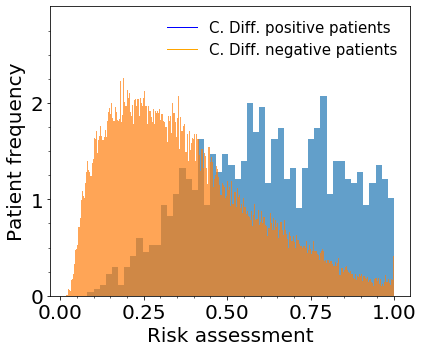

In [189]:
ax=plt.gca()
ax.set_xticks(np.arange(0.0,1.0,0.05),minor=True)
ax.set_yticks(np.arange(0.0,3.0,0.25),minor=True)
cdiff_pos_probs.hist(bins=50,density=True,grid=False,ax=ax,alpha=0.7);
cdiff_neg_probs.hist(bins=300,density=True,grid=False,ax=ax,alpha=0.7);
plt.title(label="");
cdiff_pos = mlines.Line2D([], [], c='b', lw=1.0, label = 'C. Diff. positive patients');
cdiff_neg = mlines.Line2D([], [], c='orange', lw=1.0, label='C. Diff. negative patients');
plt.legend(handles=[cdiff_pos,cdiff_neg],frameon=False,fontsize=15);
plt.xlabel("Risk assessment",fontsize=20);
plt.ylabel("Patient frequency",fontsize=20);
plt.xticks([0.0,0.25,0.5,0.75,1.0],fontsize=20);
plt.yticks([0.0,1.0,2.0],fontsize=20);
plt.ylim([0,3.0]);
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.tight_layout();
plt.savefig("./week_3/cdiff_populations.jpg")

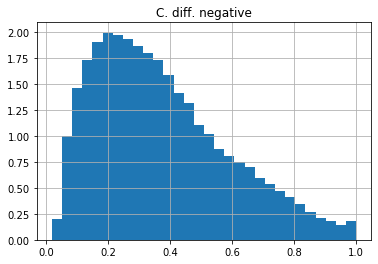

In [46]:
cdiff_neg_probs.hist(bins=30,density=True);